# HSN 503: Financial Economics


<p align="center">
  <img src="img/logo.png" alt="Logo" width="400" height="400">
</p>



#### Team- 
* Vinayak Rai
* Anish Kumar
* Yuvraj Singh
* Shreya Bakshi
* Karan Maniyar
* Harshit Singh

### Exercise 3

# Table of Contents

1. [Introduction](#Introduction)
2. [Healthcare Sector](#Sector-1:-Healthcare)
   1. [Price Plot](#Price-plots-of-Healthcare-stocks)
   2. [Return Plot](#Return-plots-of-Healthcare-stocks)
   3. [Volatility Measures](#Volatility-Measures-for-Healthcare-sector)
      1. [Standard Deviation](#1.-Standard-Deviation-for-Healthcare-sector)
      2. [Historical Volatility](#2.-Historical-Volatility-for-Healthcare-sector)
      3. [Average True Range](#3.-Average-True-Range-for-Healthcare-sector)
      4. [Beta](#4.-Beta-for-Healthcare-sector)
      5. [Max Drawdown](#5.-Max-Drawdown-for-Healthcare-sector)
4. [Energy Sector](#Sector-2:-Energy)
      1. [Price Plot](#Price-plots-of-Energy-stocks)
      2. [Return Plot](#Return-plots-of-Energy-stocks)
      3. [Volatility Measures](#Volatility-Measures-for-Energy-sector)
          1. [Standard Deviation](#1.-Standard-Deviation-for-Energy-sector)
          2. [Historical Volatility](#2.-Historical-Volatility-for-Energy-sector)
          3. [Average True Range](#3.-Average-True-Range-for-Energy-sector)
          4. [Beta](#4.-Beta-for-Energy-sector)
          5. [Max Drawdown](#5.-Max-Drawdown-for-Energy-sector)
6. [FMCG Sector](#Sector-3:-FMCG)
      1. [Price Plot](#Price-plots-of-FMCG-stocks)
      2. [Return Plot](#Return-plots-of-FMCG-stocks)
      3. [Volatility Measures](#Volatility-Measures-for-FMCG-sector)
          1. [Standard Deviation](#1.-Standard-Deviation-for-FMCG-sector)
          2. [Historical Volatility](#2.-Historical-Volatility-for-FMCG-sector)
          3. [Average True Range](#3.-Average-True-Range-for-FMCG-sector)
          4. [Beta](#4.-Beta-for-FMCG-sector)
          5. [Max Drawdown](#5.-Max-Drawdown-for-FMCG-sector)
8. [Conclusion](#Conclusion)

# Introduction

In this python work we have used different volatility measures to understand the risk associated with our chosen stocks.
The Volatiltiy Measures we have considered are listed below:-

### 1. **Standard Deviation on Log Returns**
   - **Explanation**: Standard deviation is a statistical measure that quantifies the amount of variation or dispersion of a set of values. For financial data, it is commonly applied to log returns of asset prices to gauge the asset's volatility. Log returns are used because they are time-additive, making them more appropriate for continuous compounding.
   - **Formula**: 
     $
     \sigma = \sqrt{\frac{1}{N-1} \sum_{i=1}^{N} (r_i - \bar{r})^2}
     $
     where:
     - $r_i$ = Log return of the asset at time $i$
     - $\bar{r}$ = Mean of the log returns
     - $N$ = Number of observations

### 2. **Historical Volatility (20-Day Rolling Period)**
   - **Explanation**: Historical volatility is the standard deviation of an asset's returns over a specified period, reflecting how much the asset's price has fluctuated in the past. A 20-day rolling period is often used to create a moving volatility graph, which gives a dynamic view of how volatility changes over time.
   - **Formula**: 
     $
     \sigma_{20} = \sqrt{\frac{1}{19} \sum_{i=1}^{20} (r_i - \bar{r})^2}
     $
     where:
     - $\sigma_{20}$ = 20-day historical volatility
     - $r_i$ = Return of the asset at day $i$
     - $\bar{r}$ = Mean of the returns over the 20-day period

### 3. **Average True Range (ATR) for 14-Day Rolling Period**
   - **Explanation**: The Average True Range (ATR) is a measure of market volatility that captures the average range of price movement over a specific period, typically 14 days. It considers the greatest of the following: the current high minus the current low, the absolute value of the current high minus the previous close, and the absolute value of the current low minus the previous close.
   - **Formula**: 
     $
     ATR_{14} = \frac{1}{14} \sum_{i=1}^{14} TR_i
     $
     where:
     - $TR_i$ = True range on day $i$, calculated as:
       $
       TR_i = \max[(H_i - L_i), |H_i - C_{i-1}|, |L_i - C_{i-1}|]
       $
     - $H_i$ = High price on day $i$
     - $L_i$ = Low price on day $i$
     - $C_{i-1}$ = Closing price on day $i-1$

### 4. **Beta of Stocks**
   - **Explanation**: Beta is a measure of a stock's volatility in relation to the overall market. A beta of 1 indicates that the stock's price tends to move with the market. A beta greater than 1 indicates higher volatility than the market, while a beta less than 1 indicates lower volatility.
   - **Formula**: 
     $
     \beta = \frac{\text{Cov}(r_i, r_m)}{\sigma_m^2}
     $
     where:
     - $r_i$ = Return of the stock
     - $r_m$ = Return of the market
     - $\sigma_m^2$ = Variance of the market returns
     - $\text{Cov}(( r_i, r_m ))$ = Covariance of the stock return with the market return

### 5. **Maximum Drawdown of Stocks**
   - **Explanation**: Maximum Drawdown (MDD) is a risk measure that indicates the maximum loss from a peak to a trough in the value of a portfolio or investment before a new peak is achieved. It is used to assess the downside risk over a specific period.
   - **Formula**: 
     $
     MDD = \frac{\text{Peak} - \text{Trough}}{\text{Peak}}
     $
     where:
     - $\text{Peak}$ = The highest value before the drawdown begins
     - $\text{Trough}$ = The lowest value after the peak during the drawdown

Each of these volatility measures provides a different perspective on risk and price variability, helping investors make informed decisions based on their risk tolerance and market conditions.

In [1]:
# Importing Modules
from volatility_OOPS import volatility as vol
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf

#### Selected Stocks

In [2]:
# Defining Start and End dates for data retrieval
start_date = '2019-07-31'
end_date = '2024-07-31'

# Selecting Stocks
healthcare_stocks = ['SUNPHARMA.NS', 'DRREDDY.NS', 'CIPLA.NS', 'JBCHEPHARM.NS', 'POLYMED.NS', 'ABBOTINDIA.NS', 'ZYDUSLIFE.NS']
energy_stocks = ['NTPC.NS','RELIANCE.NS', 'ADANIPOWER.NS', 'BPCL.NS','COALINDIA.NS', 'GSPL.NS', 'UNOMINDA.NS']
fmcg_stocks = ['ITC.NS','MARICO.NS', 'BRITANNIA.NS', 'COLPAL.NS', 'VBL.NS','NAVNETEDUL.NS', 'BALRAMCHIN.NS']

# Downloading Historical daily data
data_healthcare = yf.download(healthcare_stocks, start=start_date, end=end_date)
data_energy = yf.download(energy_stocks, start=start_date, end=end_date)
data_fmcg = yf.download(fmcg_stocks, start=start_date, end=end_date)

# Selecting Nifty50 returns to calculate beta 
market = yf.download('^NSEI', start=start_date, end=end_date)['Adj Close']
market_returns = np.log(market).diff()

[*********************100%%**********************]  7 of 7 completed
[*********************100%%**********************]  7 of 7 completed
[*********************100%%**********************]  7 of 7 completed
[*********************100%%**********************]  1 of 1 completed


# Sector 1: Healthcare

In [3]:
healthcare_close = data_healthcare['Adj Close']

#### Price plots of Healthcare stocks

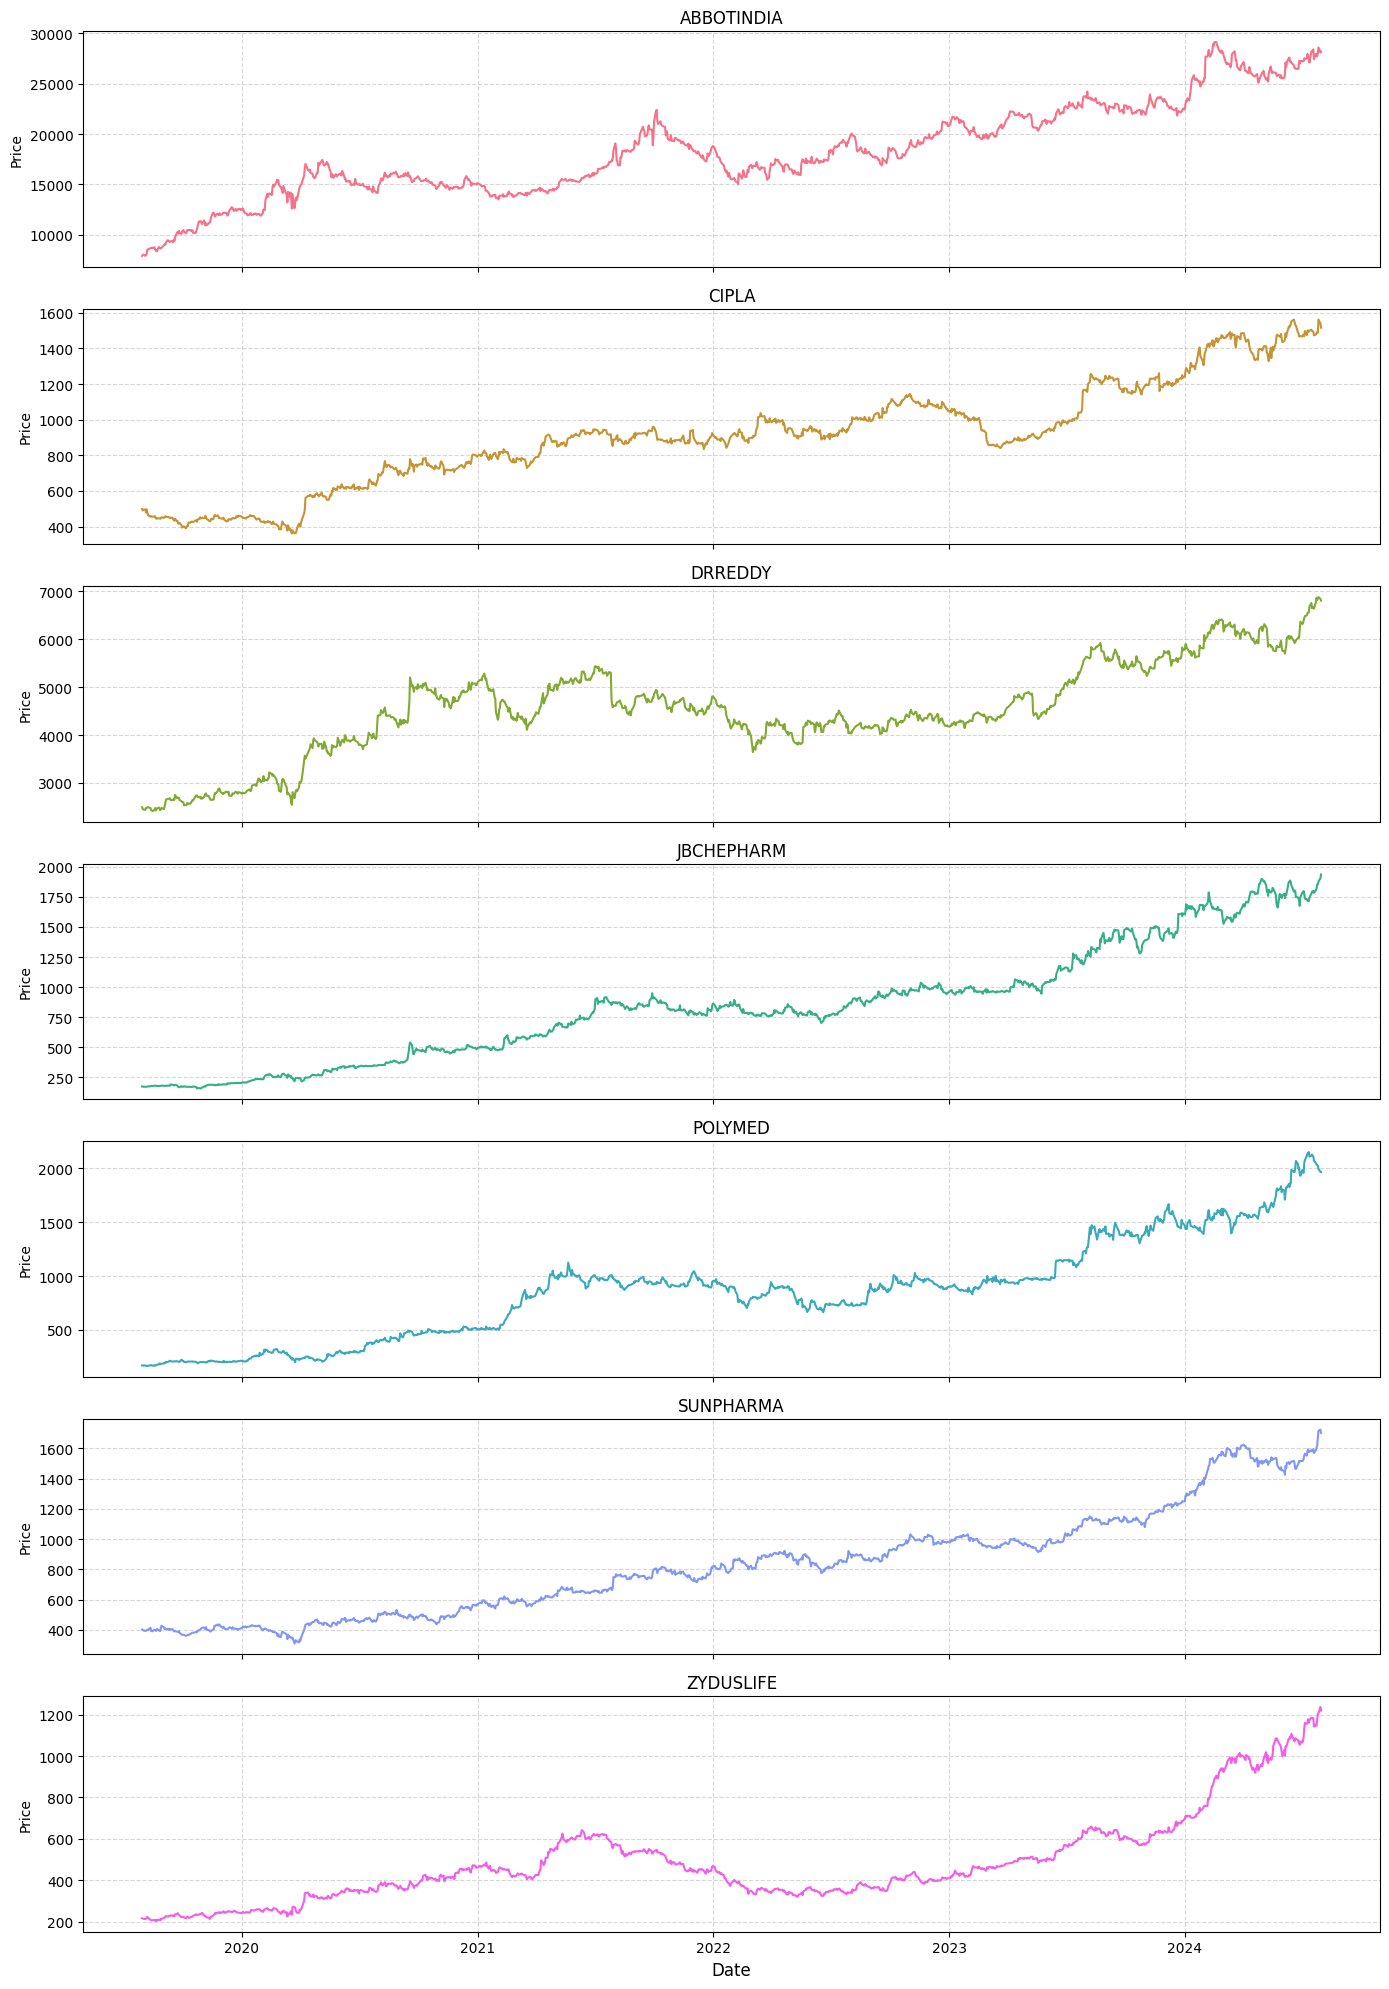

In [4]:
# Plotting Price
fig, axs = plt.subplots(nrows=7, ncols=1, figsize=(14, 20), sharex=True)
colors = sns.color_palette("husl", 7)

for i, column in enumerate([col for col in healthcare_close]):
    sns.lineplot(x=healthcare_close.index, y=healthcare_close[column], ax=axs[i], color=colors[i % len(colors)])
    axs[i].set_title(column.split('.')[0], fontsize=12)
    axs[i].set_ylabel('Price', fontsize=10)
    axs[i].grid(True, linestyle='--', alpha=0.5)

plt.xlabel('Date', fontsize=12)
plt.tight_layout()
plt.show()

#### Return plots of Healthcare stocks

In [5]:
# Getting Returns
returns_data = vol.returns(data_healthcare['Adj Close']).dropna()

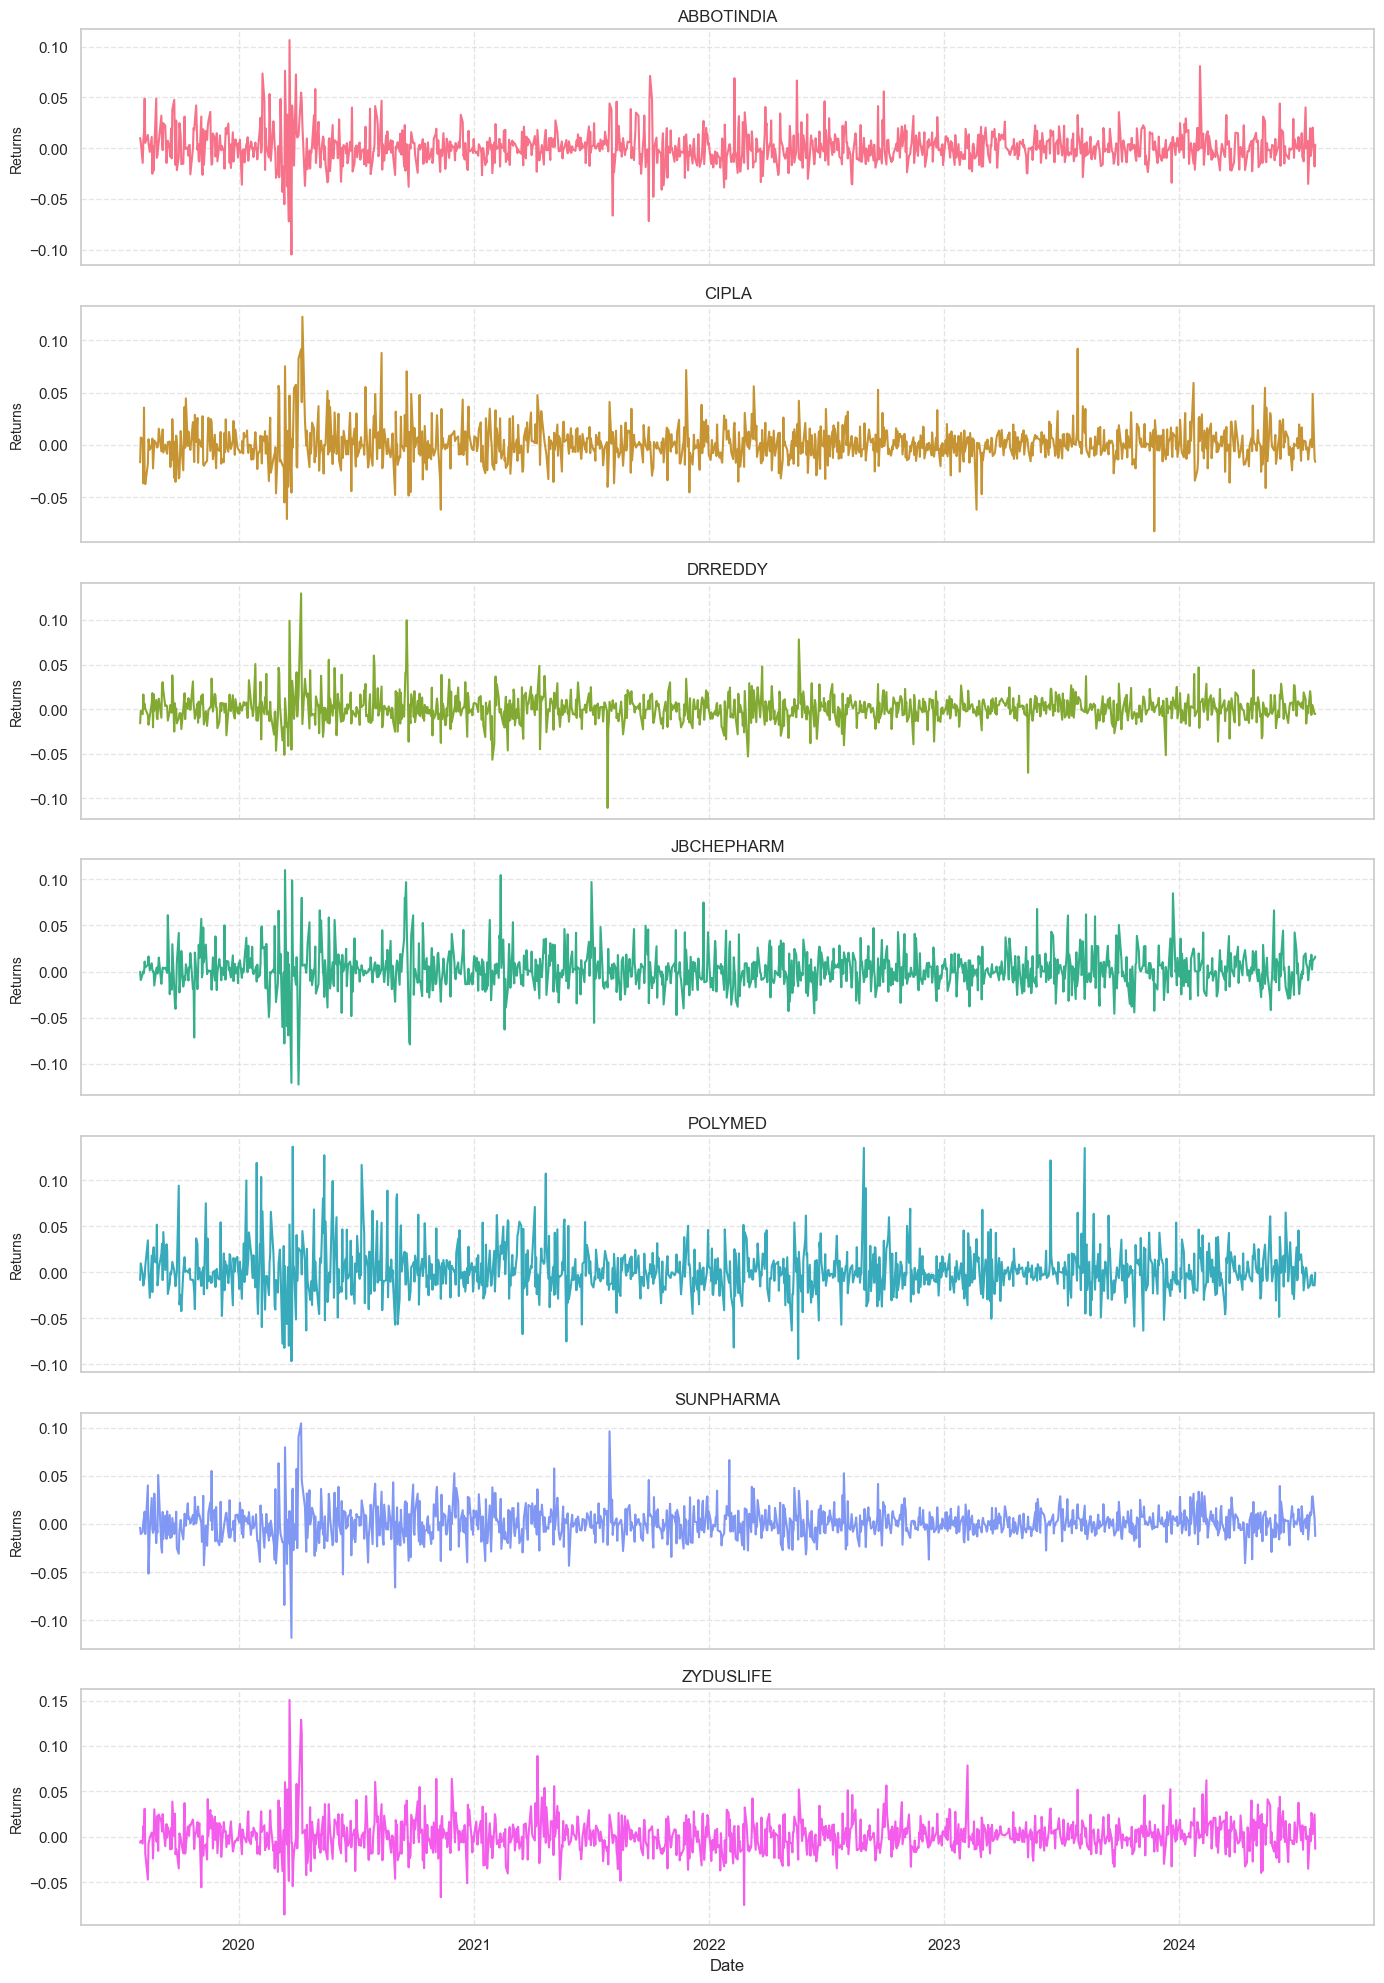

In [6]:
# Plotting Returns
sns.set(style="whitegrid")

fig, axs = plt.subplots(nrows=7, ncols=1, figsize=(14, 20), sharex=True)

for i, column in enumerate([col for col in returns_data.columns if '_log_returns' in col]):
    sns.lineplot(x=returns_data.index, y=returns_data[column], ax=axs[i], color=colors[i % len(colors)])
    axs[i].set_title(column.split('.')[0], fontsize=12)
    axs[i].set_ylabel('Returns', fontsize=10)
    axs[i].grid(True, linestyle='--', alpha=0.5)

plt.xlabel('Date', fontsize=12)
plt.tight_layout()
plt.show()

In [7]:
### Volatility Measures for Healthcare sector

#### 1. Standard Deviation for Healthcare sector

In [8]:
vol.standard_deviation(healthcare_close)

Returns  Log Returns
Stock                               
ABBOTINDIA.NS  0.016631     0.016528
CIPLA.NS       0.017555     0.017402
DRREDDY.NS     0.016076     0.015978
JBCHEPHARM.NS  0.021559     0.021418
POLYMED.NS     0.026506     0.026114
SUNPHARMA.NS   0.016658     0.016585
ZYDUSLIFE.NS   0.019033     0.018818

#### 2. Historical Volatility for Healthcare sector

In [9]:
historical = vol.historical_volatility(healthcare_close).dropna()

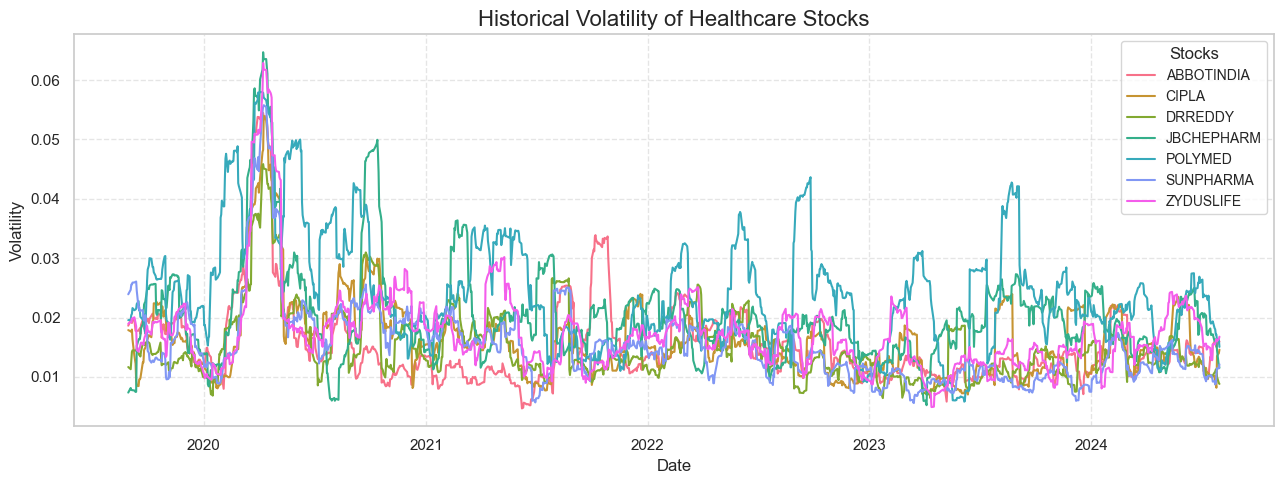

In [10]:
# Plotting Historical Volatility
plt.figure(figsize=(13, 5))
plt.grid(True, linestyle='--', alpha=0.5)

for i, column in enumerate(historical.columns):
    sns.lineplot(x=historical.index, y=historical[column], label=column.split('.')[0], color=colors[i % len(colors)])

plt.title('Historical Volatility of Healthcare Stocks', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Volatility', fontsize=12)

plt.legend(title='Stocks', fontsize=10)

plt.tight_layout()
plt.show()

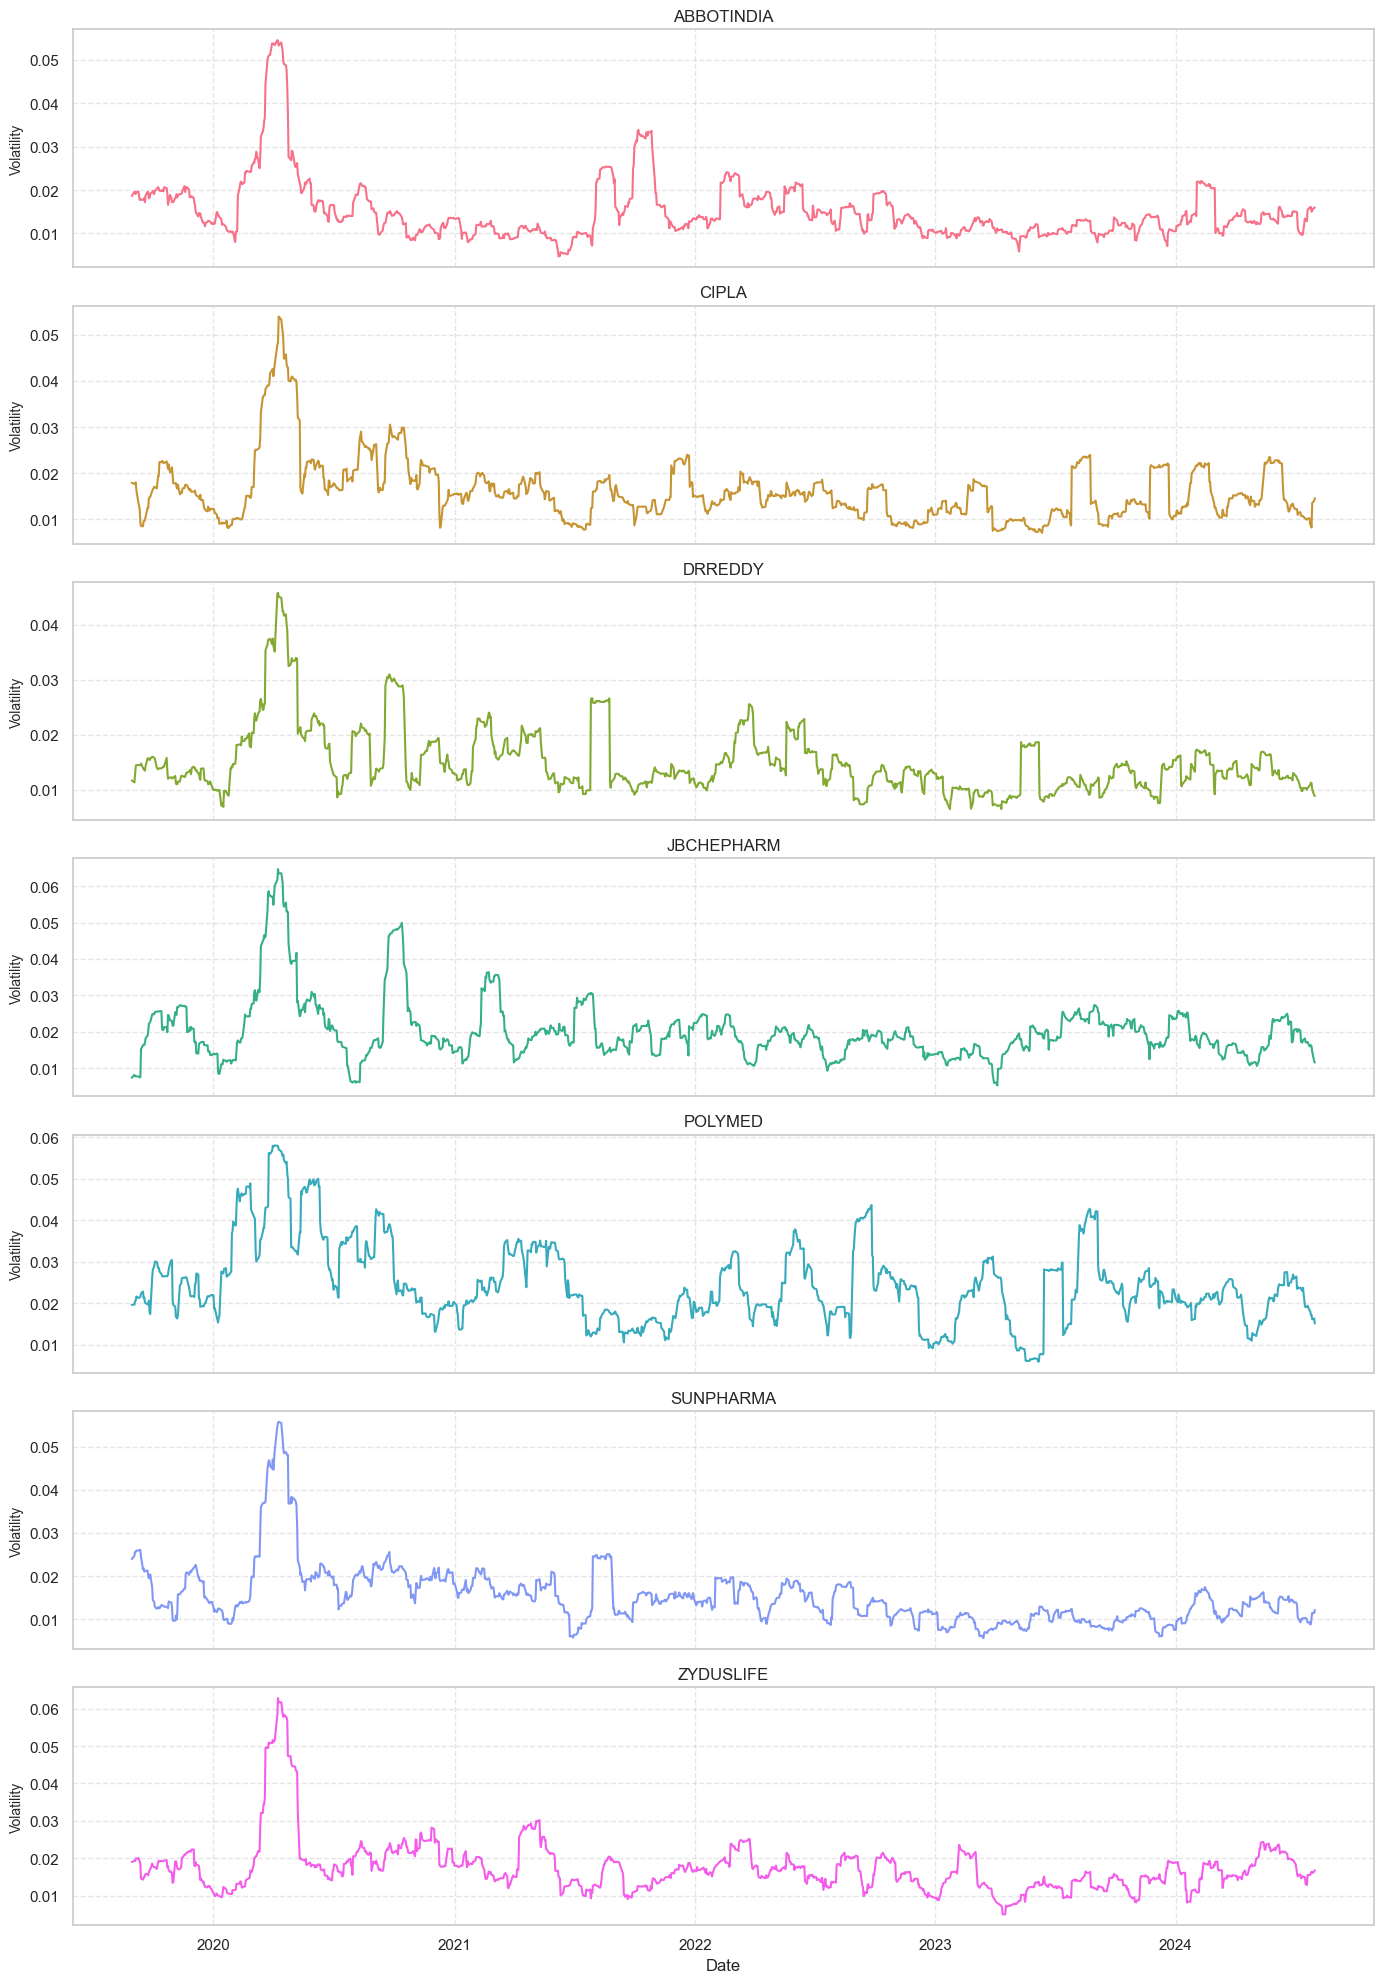

In [11]:
sns.set(style="whitegrid")

fig, axs = plt.subplots(nrows=7, ncols=1, figsize=(14, 20), sharex=True)

for i, stock in enumerate([col for col in historical]):
    sns.lineplot(x=historical.index, y=historical[stock], ax=axs[i], color=colors[i % len(colors)])
    axs[i].set_title(stock.split('.')[0], fontsize=12)
    axs[i].set_ylabel('Volatility', fontsize=10)
    axs[i].grid(True, linestyle='--', alpha=0.5)
    
plt.xlabel('Date', fontsize=12)
plt.tight_layout()
plt.show()

#### 3. Average True Range for Healthcare sector

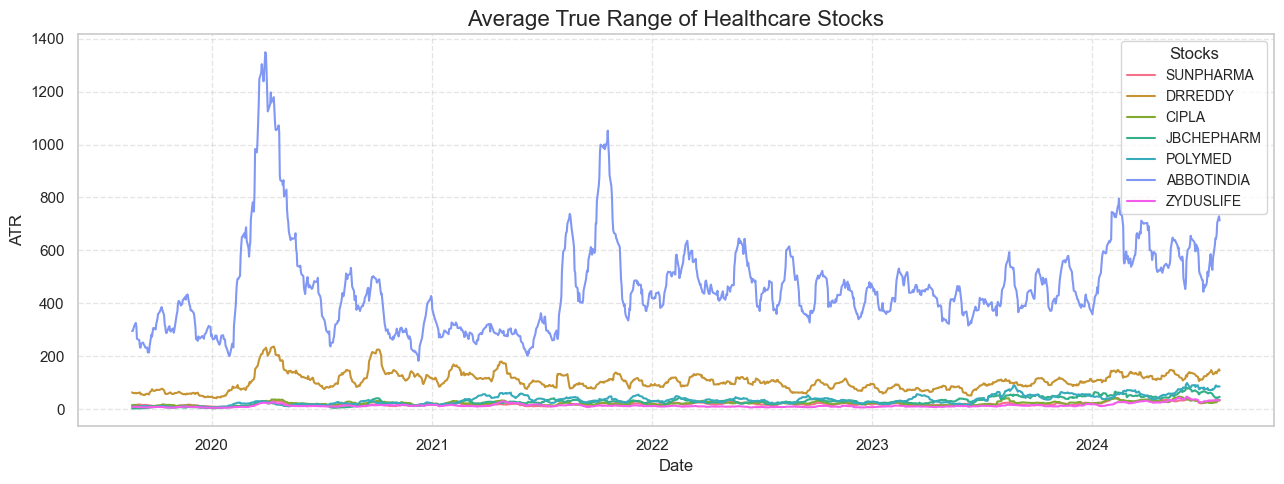

In [12]:
# Plotting ATR
plt.figure(figsize=(13, 5))
sns.set(style="whitegrid")
plt.grid(True, linestyle='--', alpha=0.5)

for i, stock in enumerate(healthcare_stocks):
    temp = pd.concat([data_healthcare['High'][stock], data_healthcare['Low'][stock], data_healthcare['Close'][stock]], axis=1)
    temp.columns = ['High', 'Low', 'Close']
    
    atr = vol.average_true_range(temp, 14)
    atr_series = atr['ATR']
    
    sns.lineplot(x=atr.index, y=atr_series, label=stock.split('.')[0], color=colors[i % len(colors)])

plt.title('Average True Range of Healthcare Stocks', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('ATR', fontsize=12)
plt.legend(title='Stocks', fontsize=10)
plt.tight_layout()
plt.show()

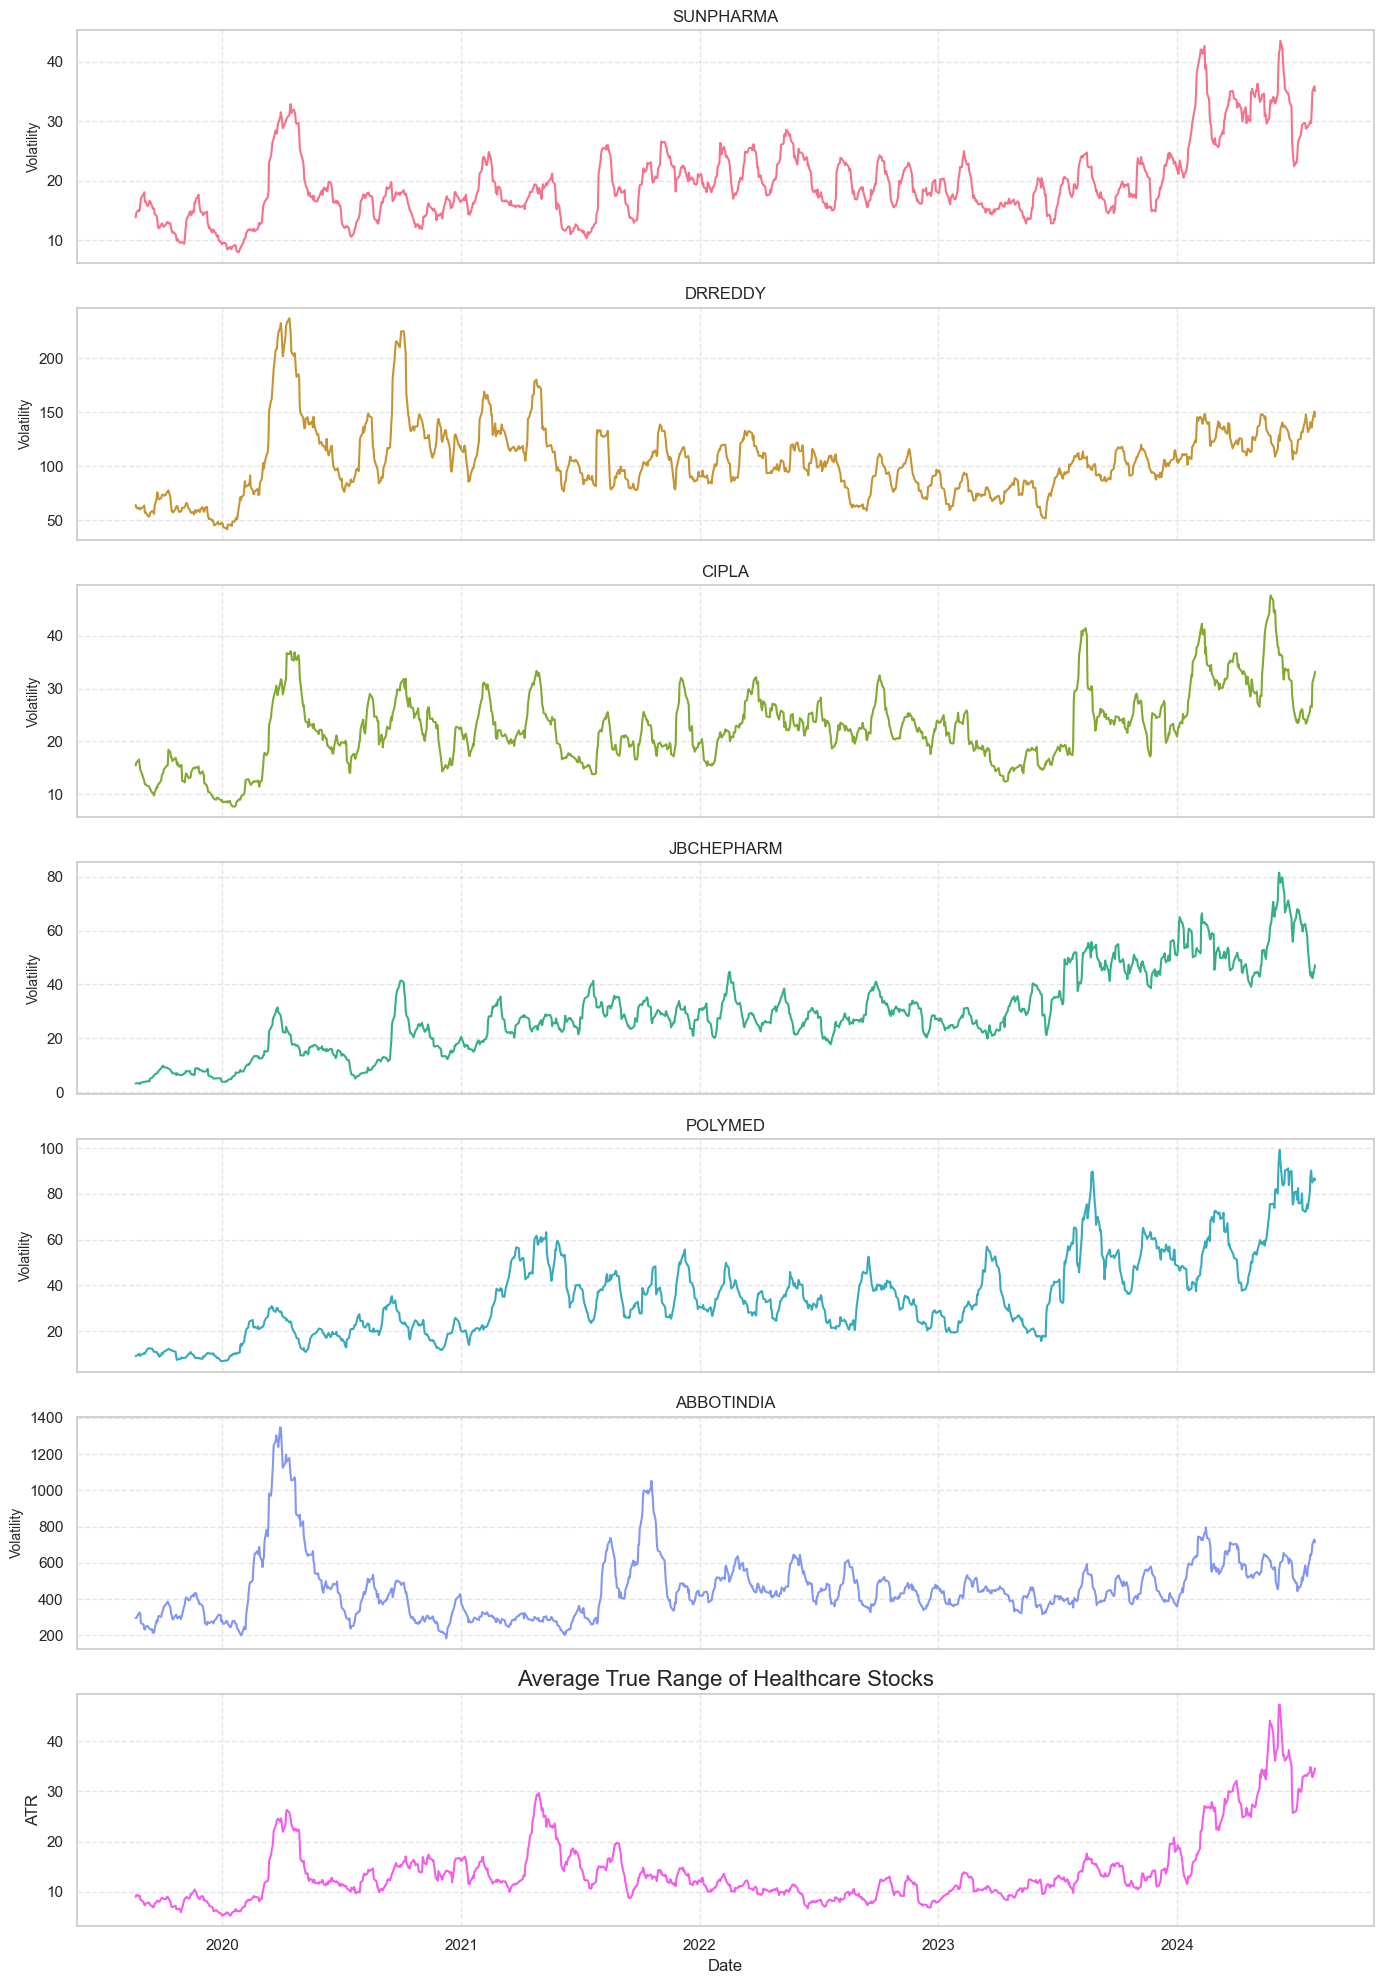

In [13]:
sns.set(style="whitegrid")

fig, axs = plt.subplots(nrows=7, ncols=1, figsize=(14, 20), sharex=True)

for i, stock in enumerate(healthcare_stocks):
    temp = pd.concat([data_healthcare['High'][stock], data_healthcare['Low'][stock], data_healthcare['Close'][stock]], axis=1)
    temp.columns = ['High', 'Low', 'Close']
    
    atr = vol.average_true_range(temp, 14)
    
    atr_series = atr['ATR']
    
    sns.lineplot(x=atr.index, y=atr_series, ax=axs[i], color=colors[i % len(colors)])
    axs[i].set_title(stock.split('.')[0], fontsize=12)
    axs[i].set_ylabel('Volatility', fontsize=10)
    axs[i].grid(True, linestyle='--', alpha=0.5)

plt.title('Average True Range of Healthcare Stocks', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('ATR', fontsize=12)
plt.tight_layout()
plt.show()

#### 4. Beta for Healthcare sector

In [14]:
vol.beta(healthcare_close, market_returns)

Beta
Stock                  
ABBOTINDIA.NS  0.411168
CIPLA.NS       0.374801
DRREDDY.NS     0.449225
JBCHEPHARM.NS  0.532379
POLYMED.NS     0.537880
SUNPHARMA.NS   0.606235
ZYDUSLIFE.NS   0.517212

#### 5. Max Drawdown for Healthcare sector

In [15]:
vol.max_drawdown(data_healthcare['Adj Close'])

Max_Drawdown
ABBOTINDIA.NS     -0.328750
CIPLA.NS          -0.275312
DRREDDY.NS        -0.329961
JBCHEPHARM.NS     -0.261068
POLYMED.NS        -0.409216
SUNPHARMA.NS      -0.287847
ZYDUSLIFE.NS      -0.500653

# Sector 2: Energy

In [16]:
energy_close = data_energy['Adj Close']

#### Price plots of Energy stocks

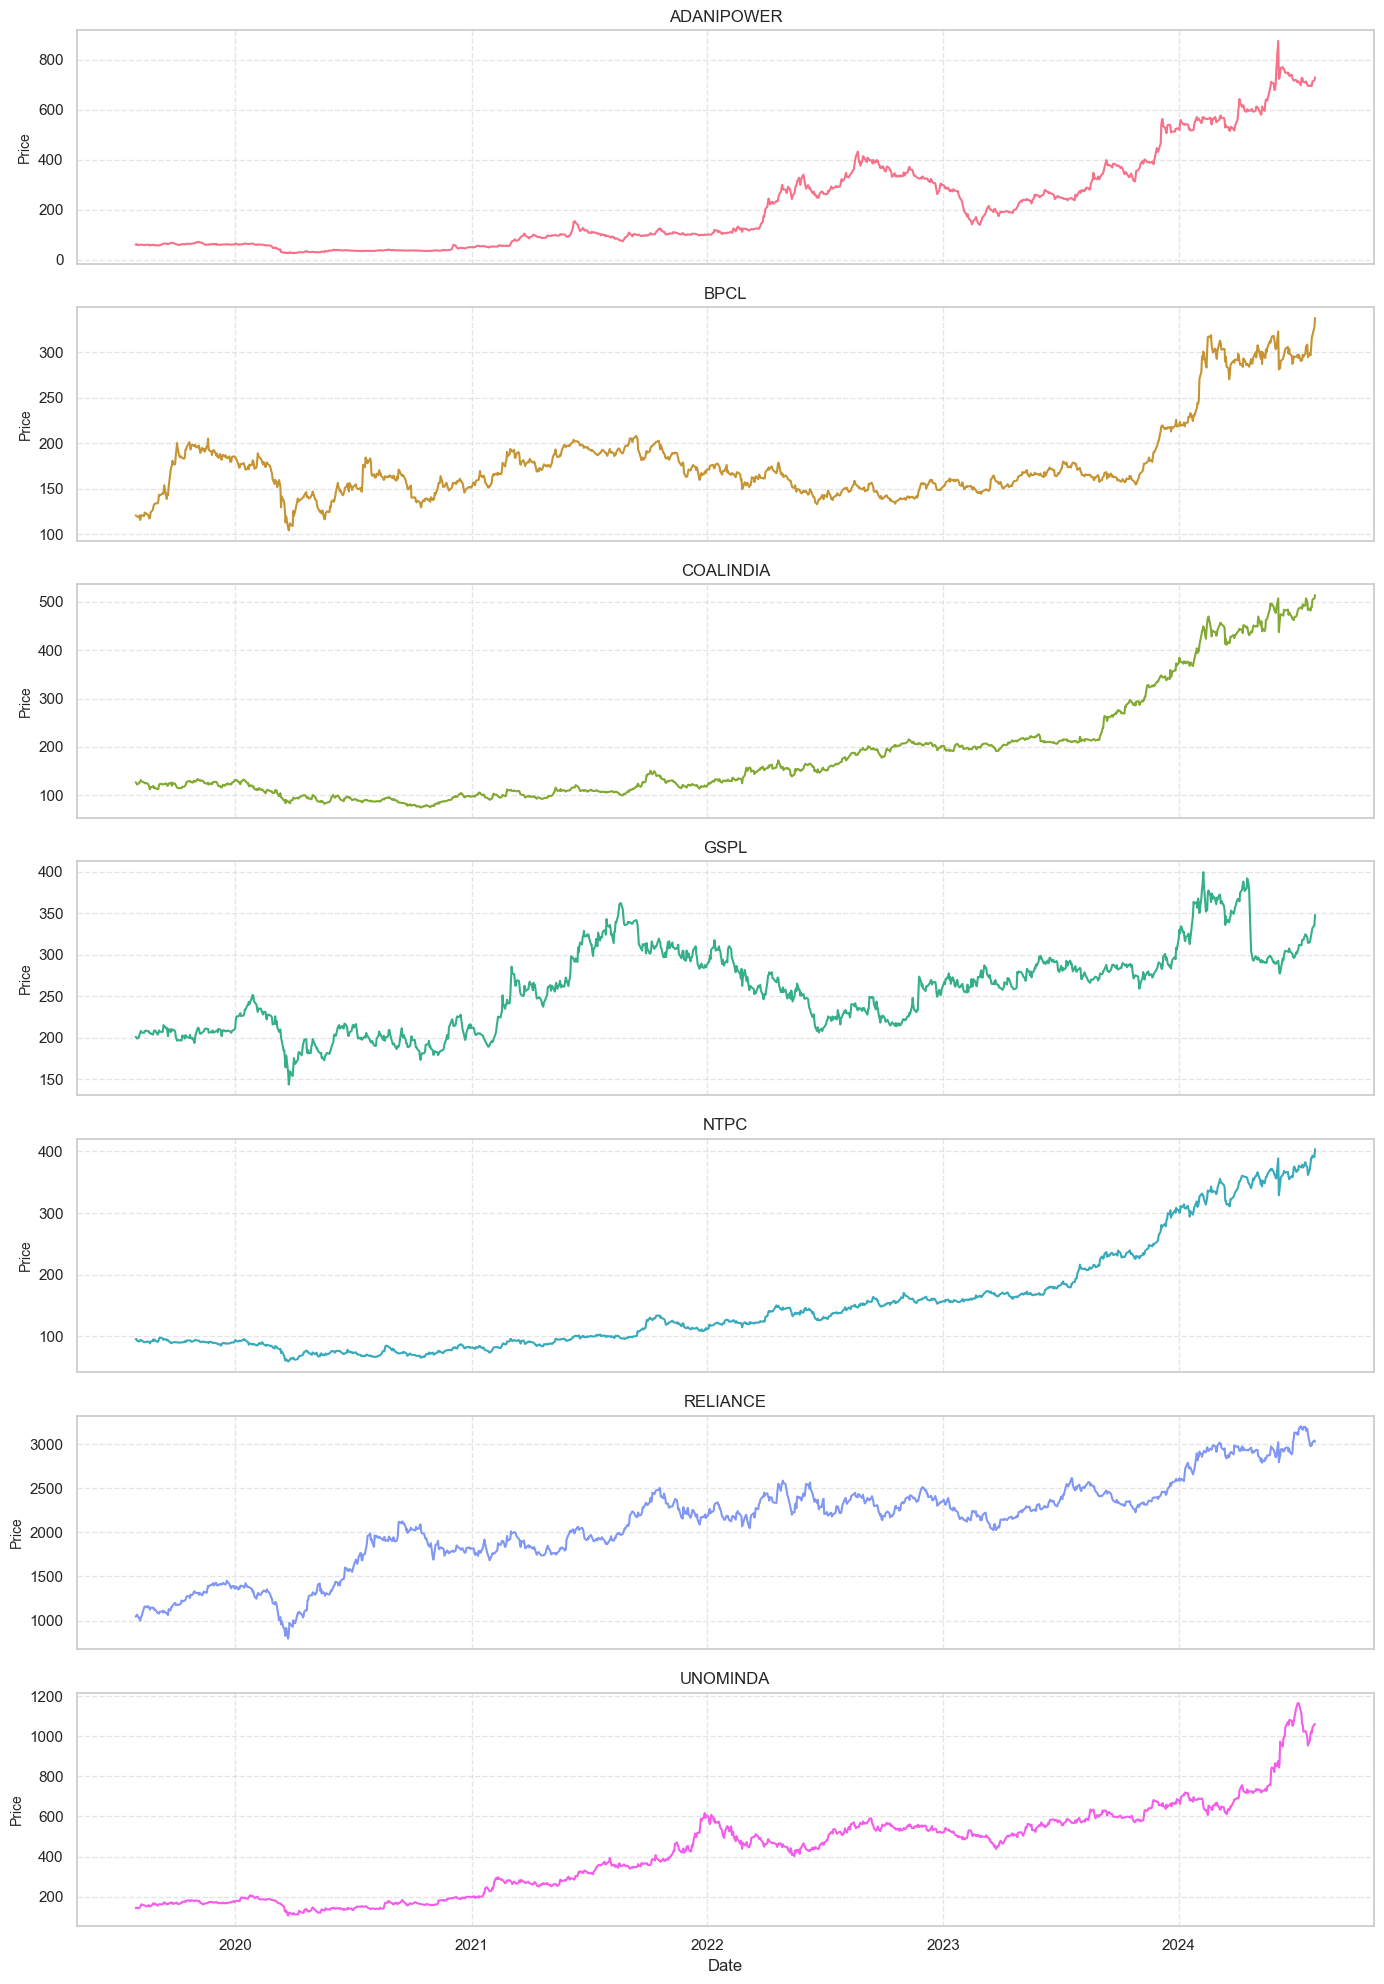

In [17]:
# Plotting Price
fig, axs = plt.subplots(nrows=7, ncols=1, figsize=(14, 20), sharex=True)

for i, column in enumerate([col for col in energy_close]):
    sns.lineplot(x=energy_close.index, y=energy_close[column], ax=axs[i], color=colors[i % len(colors)])
    axs[i].set_title(column.split('.')[0], fontsize=12)
    axs[i].set_ylabel('Price', fontsize=10)
    axs[i].grid(True, linestyle='--', alpha=0.5)

plt.xlabel('Date', fontsize=12)
plt.tight_layout()
plt.show()

#### Return plots of Energy stocks

In [18]:
# Getting Returns
returns_data = vol.returns(data_energy['Adj Close']).dropna()

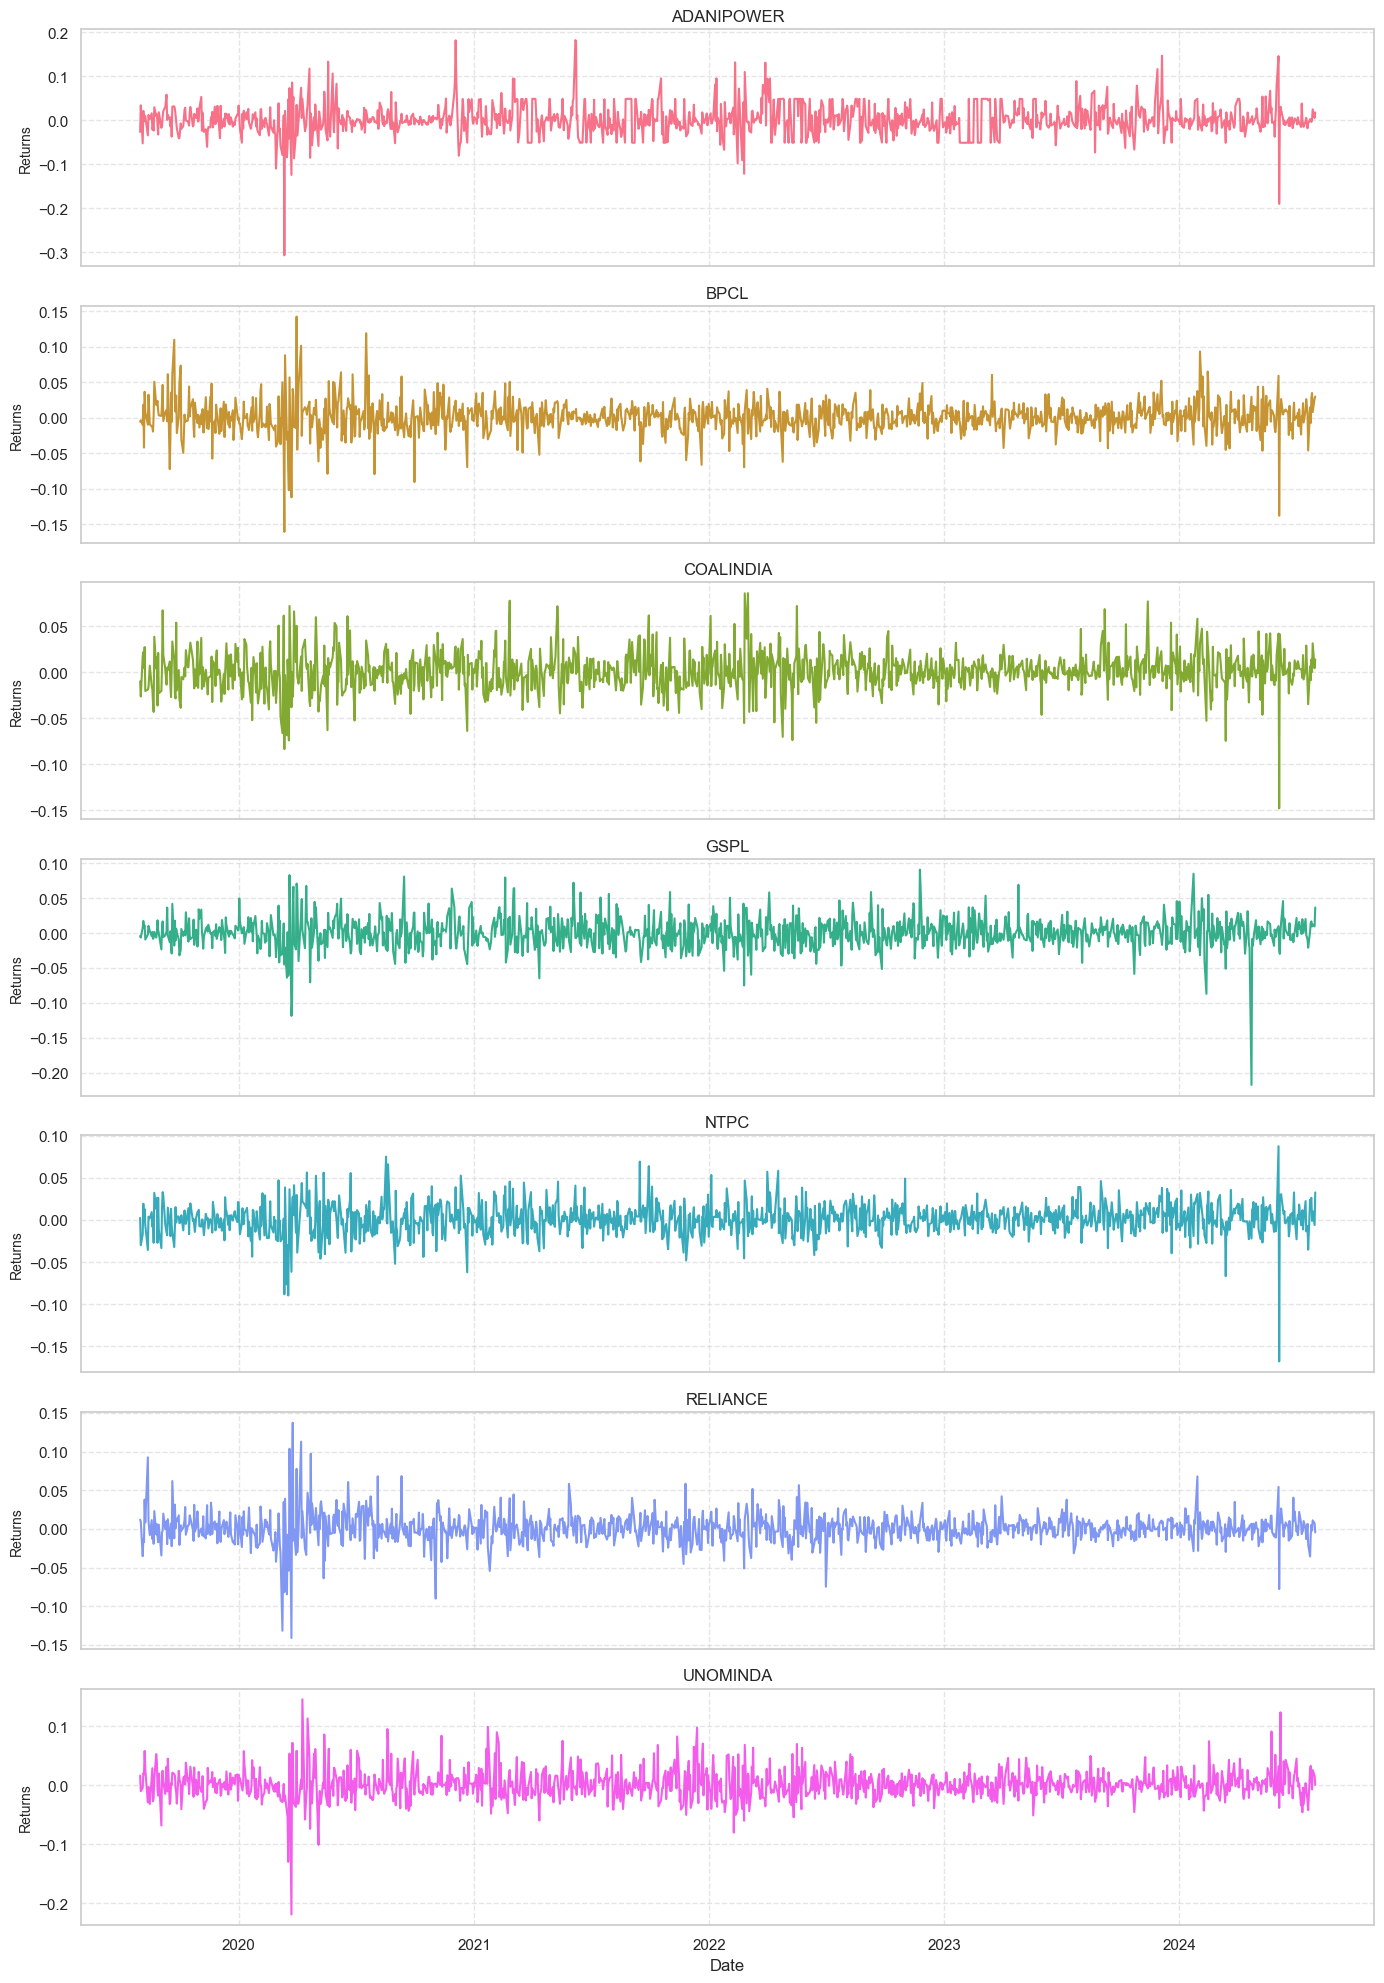

In [19]:
# Plotting Returns
sns.set(style="whitegrid")

fig, axs = plt.subplots(nrows=7, ncols=1, figsize=(14, 20), sharex=True)

for i, column in enumerate([col for col in returns_data.columns if '_log_returns' in col]):
    sns.lineplot(x=returns_data.index, y=returns_data[column], ax=axs[i], color=colors[i % len(colors)])
    axs[i].set_title(column.split('.')[0], fontsize=12)
    axs[i].set_ylabel('Returns', fontsize=10)
    axs[i].grid(True, linestyle='--', alpha=0.5)

plt.xlabel('Date', fontsize=12)
plt.tight_layout()
plt.show()

### Volatility Measures for Energy sector

#### 1. Standard Deviation for Energy sector

In [20]:
vol.standard_deviation(energy_close)

Returns  Log Returns
Stock                               
ADANIPOWER.NS  0.034948     0.034785
BPCL.NS        0.022292     0.022284
COALINDIA.NS   0.020972     0.020954
GSPL.NS        0.021886     0.021993
NTPC.NS        0.018501     0.018558
RELIANCE.NS    0.019148     0.019090
UNOMINDA.NS    0.025423     0.025304

#### 2. Historical Volatility for Energy sector

In [21]:
historical = vol.historical_volatility(energy_close).dropna()

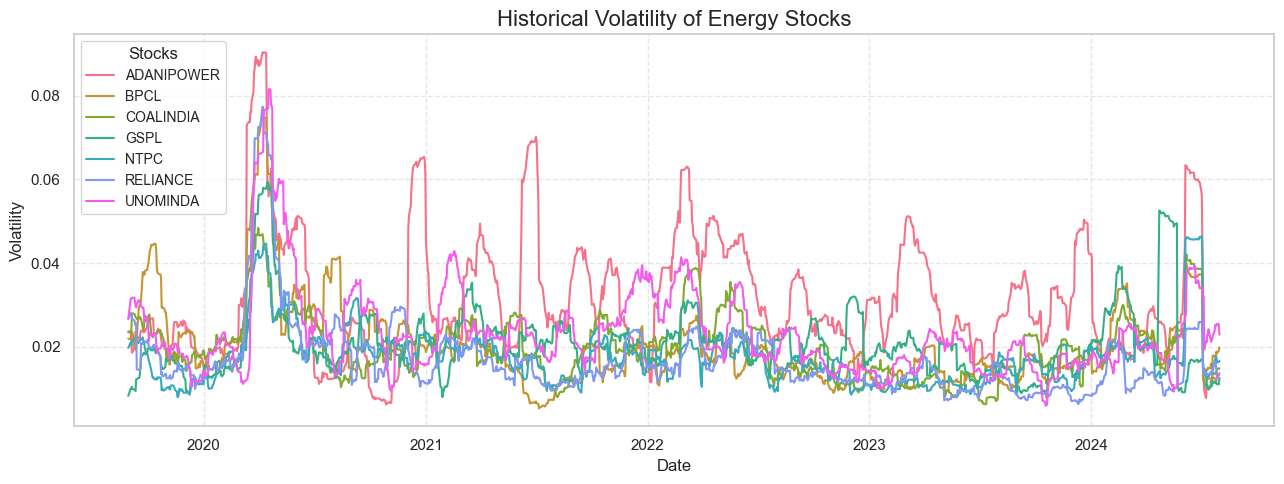

In [22]:
# Plotting Historical Volatility
plt.figure(figsize=(13, 5))
plt.grid(True, linestyle='--', alpha=0.5)

for i, column in enumerate(historical.columns):
    sns.lineplot(x=historical.index, y=historical[column], label=column.split('.')[0], color=colors[i % len(colors)])

plt.title('Historical Volatility of Energy Stocks', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Volatility', fontsize=12)

plt.legend(title='Stocks', fontsize=10)

plt.tight_layout()
plt.show()

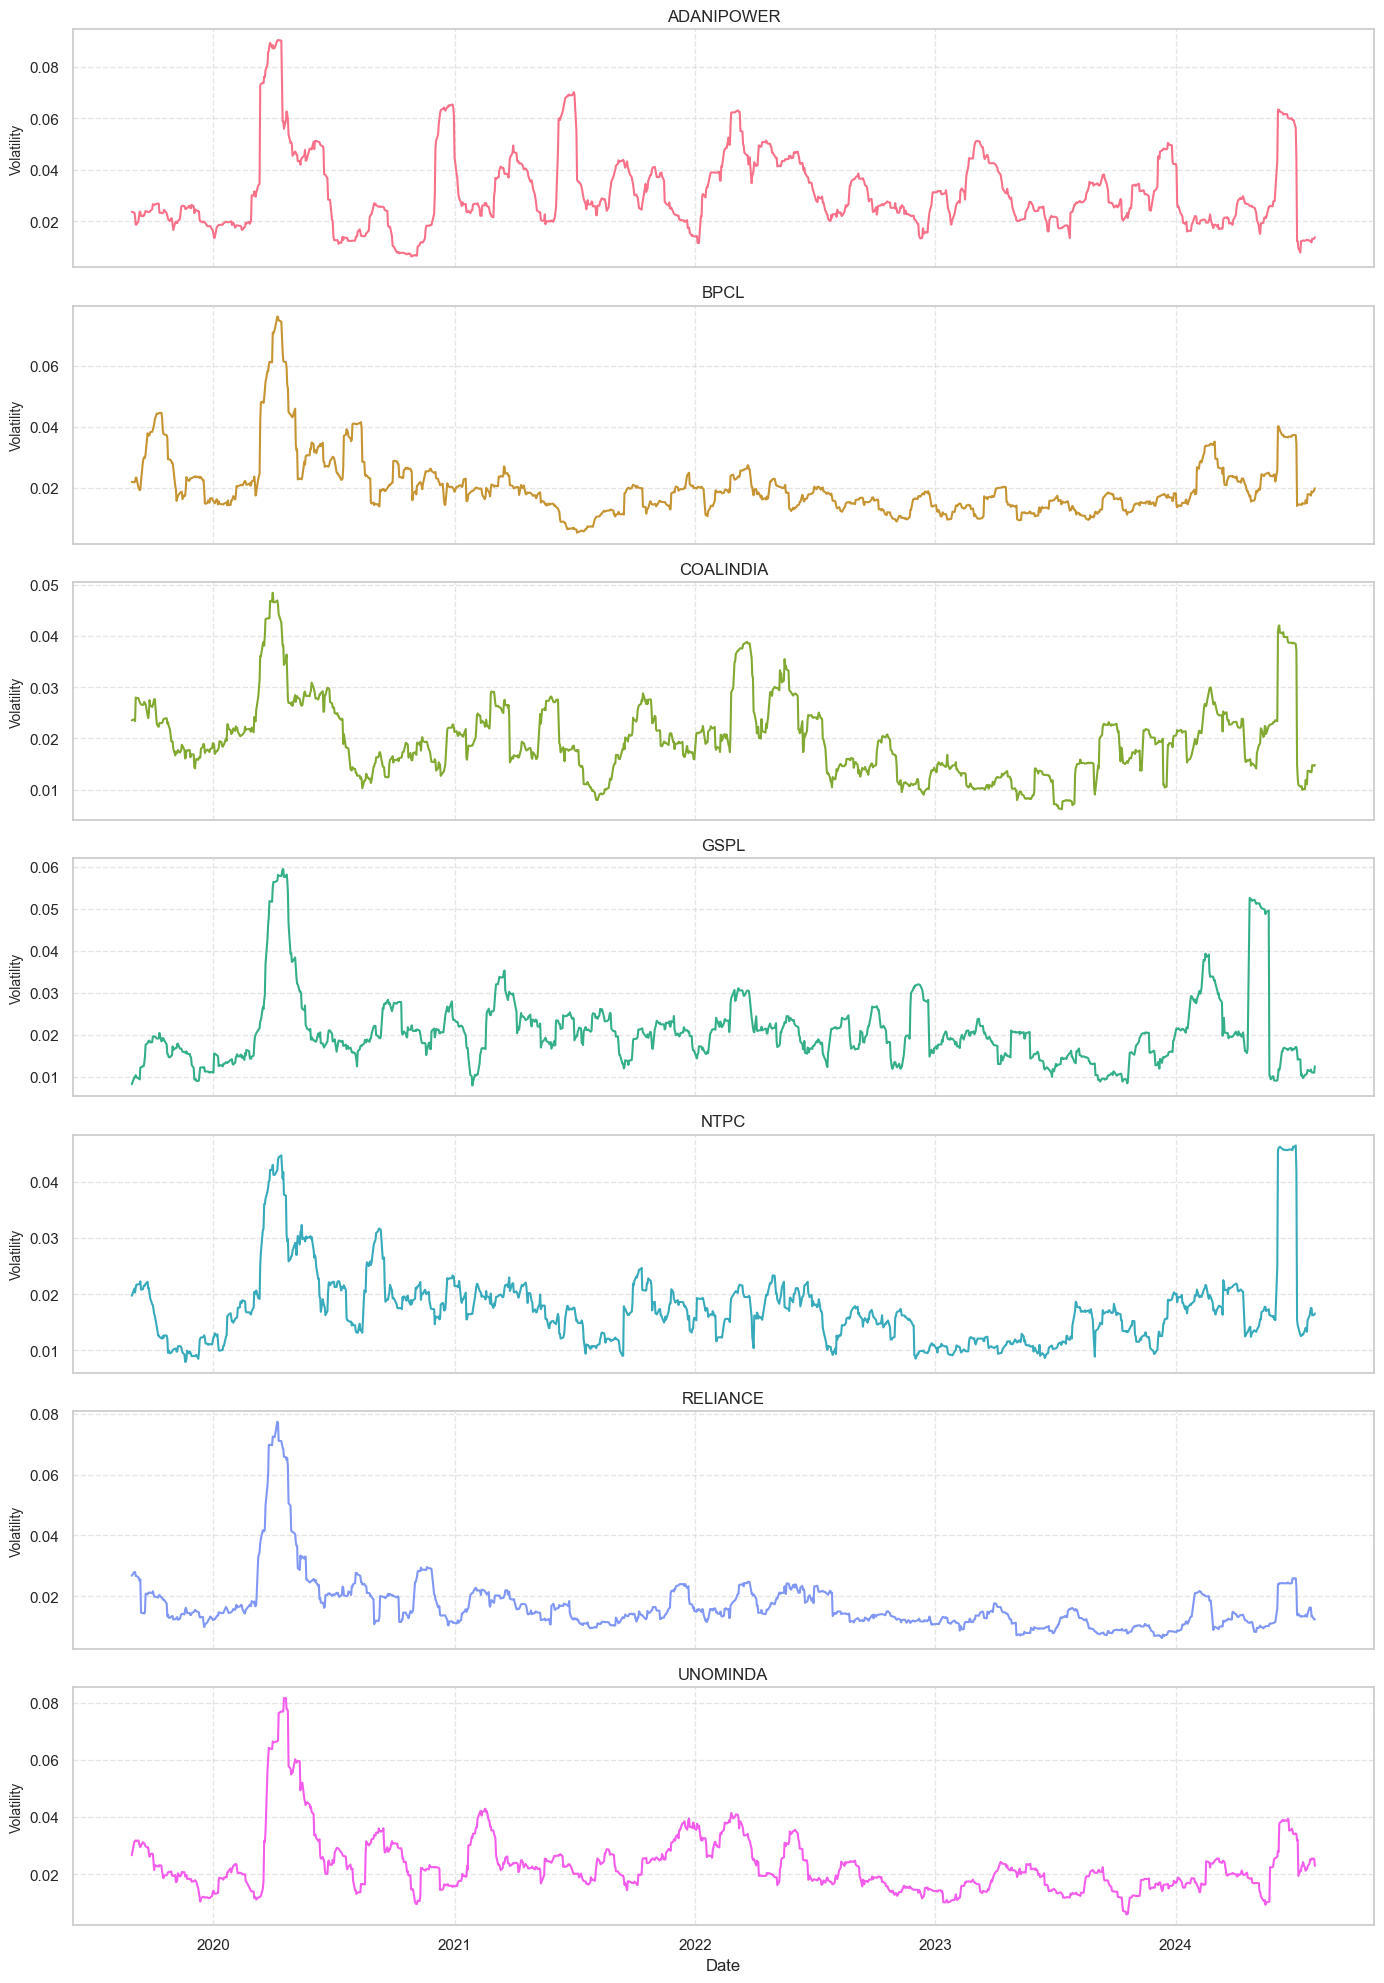

In [23]:
sns.set(style="whitegrid")

fig, axs = plt.subplots(nrows=7, ncols=1, figsize=(14, 20), sharex=True)

for i, stock in enumerate([col for col in historical]):
    sns.lineplot(x=historical.index, y=historical[stock], ax=axs[i], color=colors[i % len(colors)])
    axs[i].set_title(stock.split('.')[0], fontsize=12)
    axs[i].set_ylabel('Volatility', fontsize=10)
    axs[i].grid(True, linestyle='--', alpha=0.5)
    
plt.xlabel('Date', fontsize=12)
plt.tight_layout()
plt.show()

#### 3. Average True Range for Energy sector

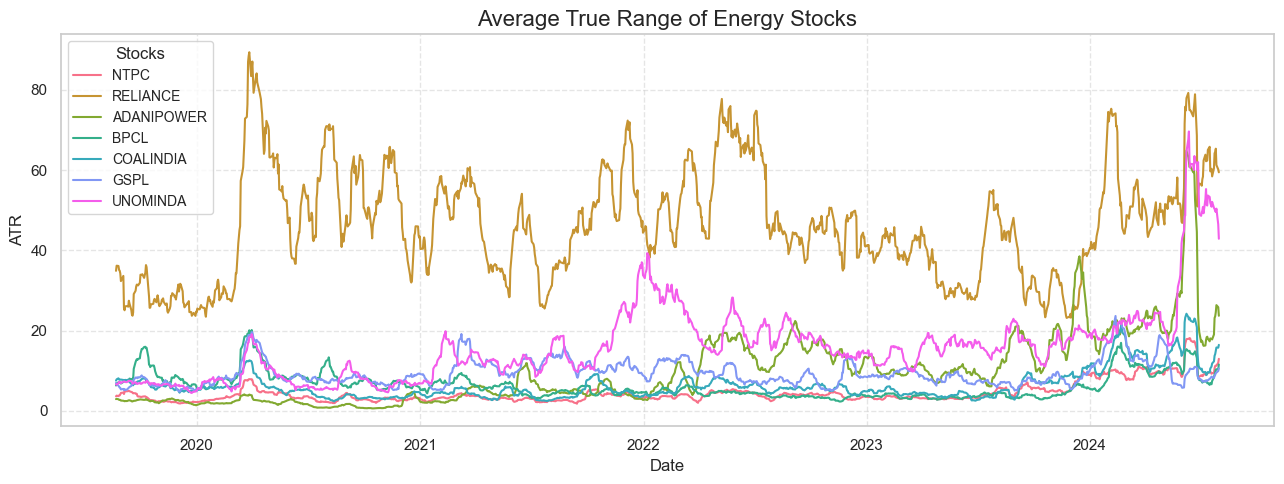

In [24]:
# Plotting ATR
plt.figure(figsize=(13, 5))
sns.set(style="whitegrid")
plt.grid(True, linestyle='--', alpha=0.5)

for i, stock in enumerate(energy_stocks):
    temp = pd.concat([data_energy['High'][stock], data_energy['Low'][stock], data_energy['Close'][stock]], axis=1)
    temp.columns = ['High', 'Low', 'Close']
    
    atr = vol.average_true_range(temp, 14)
    atr_series = atr['ATR']
    
    sns.lineplot(x=atr.index, y=atr_series, label=stock.split('.')[0], color=colors[i % len(colors)])

plt.title('Average True Range of Energy Stocks', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('ATR', fontsize=12)
plt.legend(title='Stocks', fontsize=10)
plt.tight_layout()
plt.show()

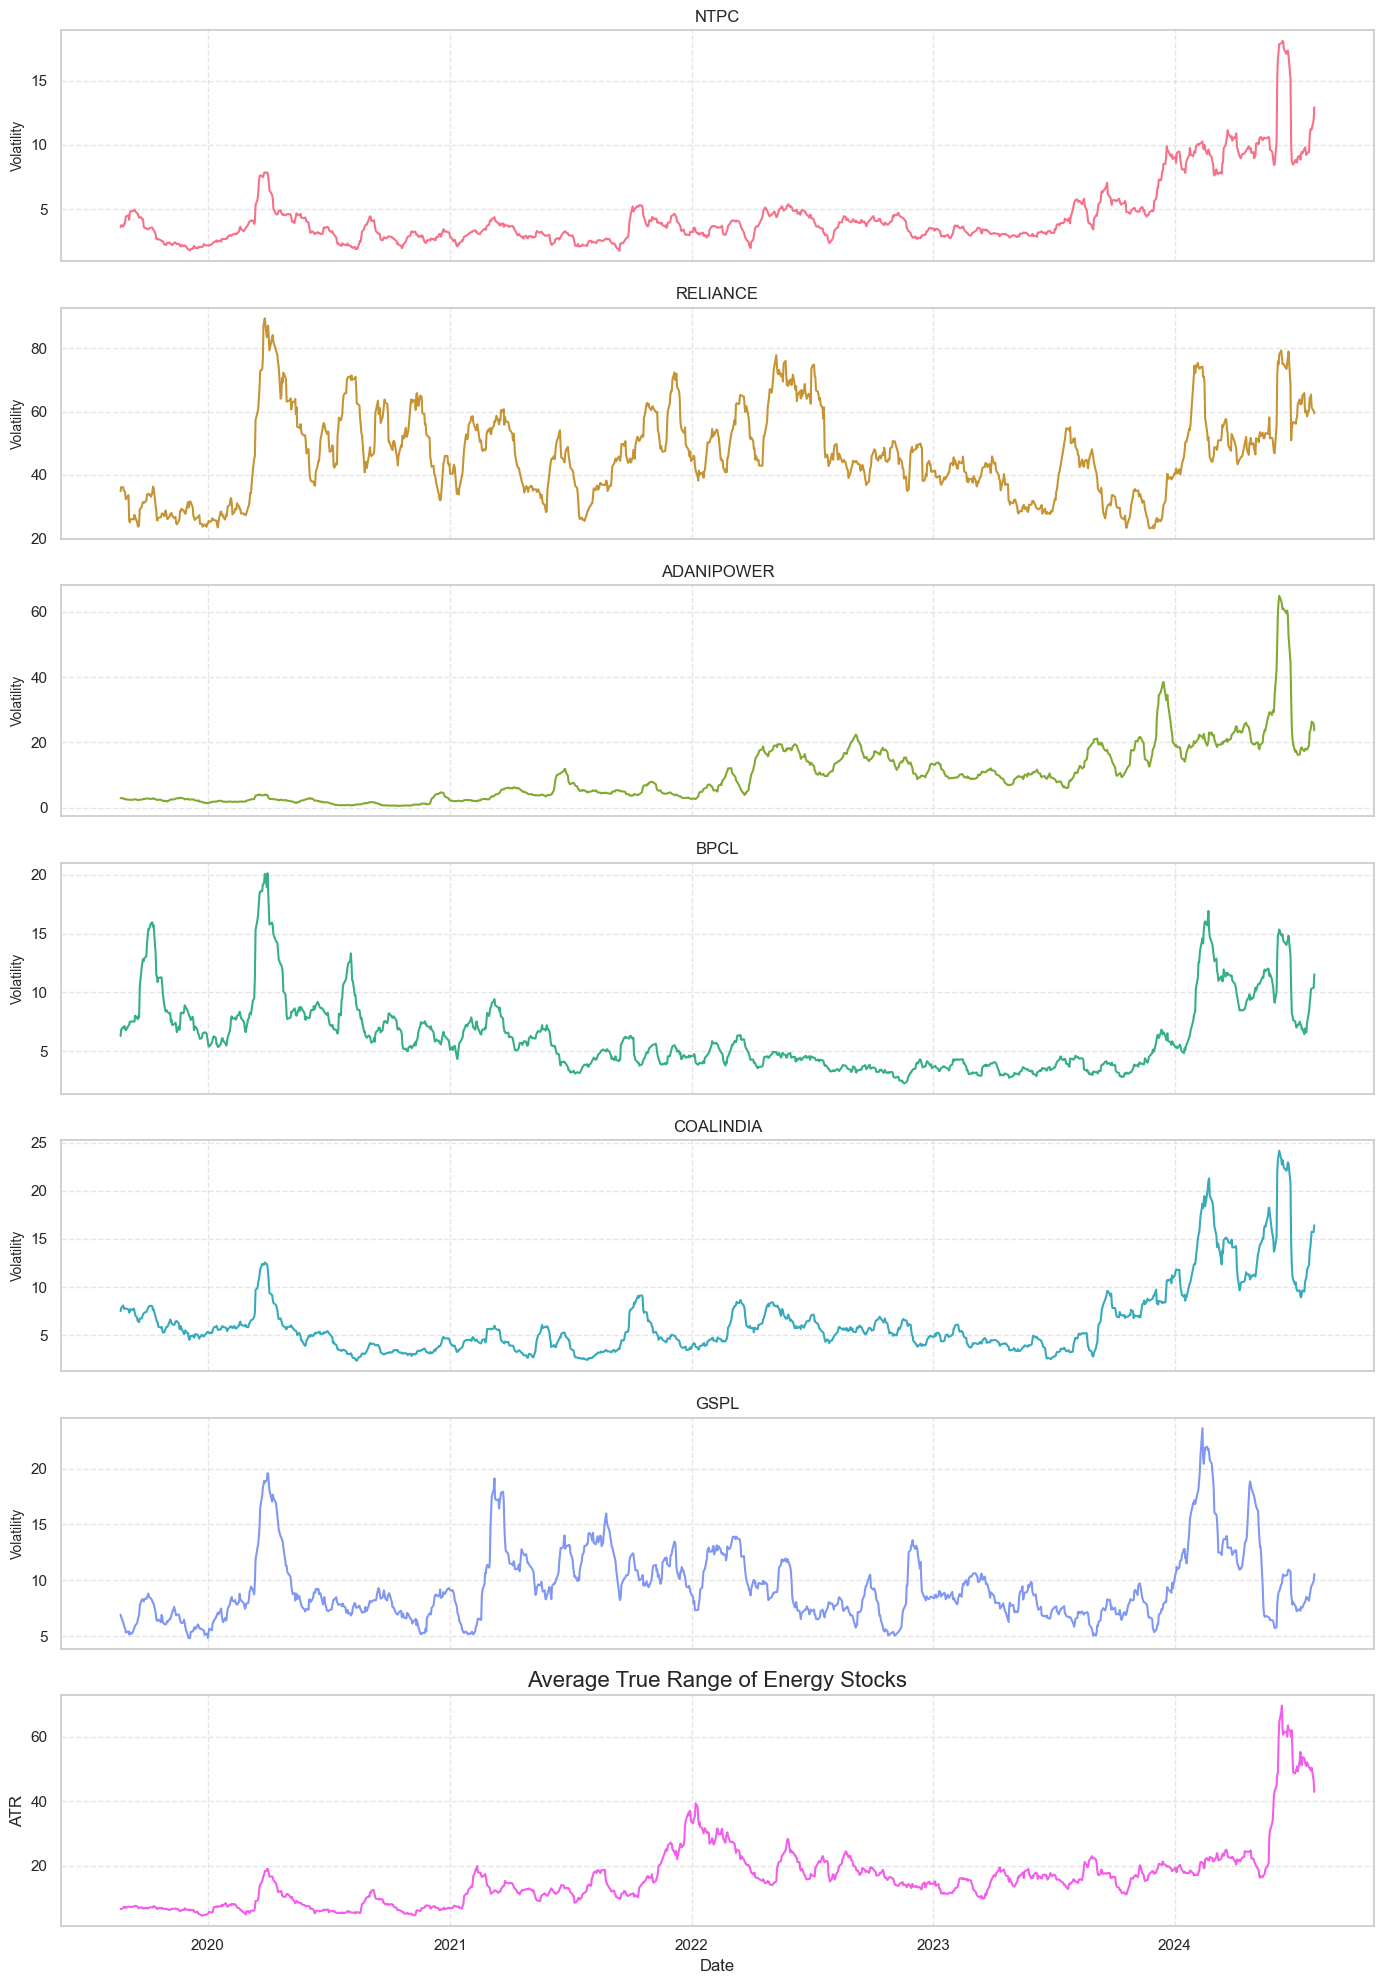

In [25]:
sns.set(style="whitegrid")

fig, axs = plt.subplots(nrows=7, ncols=1, figsize=(14, 20), sharex=True)

for i, stock in enumerate(energy_stocks):
    temp = pd.concat([data_energy['High'][stock], data_energy['Low'][stock], data_energy['Close'][stock]], axis=1)
    temp.columns = ['High', 'Low', 'Close']
    
    atr = vol.average_true_range(temp, 14)
    
    atr_series = atr['ATR']
    
    sns.lineplot(x=atr.index, y=atr_series, ax=axs[i], color=colors[i % len(colors)])
    axs[i].set_title(stock.split('.')[0], fontsize=12)
    axs[i].set_ylabel('Volatility', fontsize=10)
    axs[i].grid(True, linestyle='--', alpha=0.5)

plt.title('Average True Range of Energy Stocks', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('ATR', fontsize=12)
plt.tight_layout()
plt.show()

#### 4. Beta for Energy sector

In [26]:
vol.beta(energy_close, market_returns)

Beta
Stock                  
ADANIPOWER.NS  1.206467
BPCL.NS        0.985274
COALINDIA.NS   0.802644
GSPL.NS        0.629072
NTPC.NS        0.760118
RELIANCE.NS    1.077063
UNOMINDA.NS    0.913443

#### 5. Max Drawdown for Energy sector

In [27]:
vol.max_drawdown(data_energy['Adj Close'])

Max_Drawdown
ADANIPOWER.NS     -0.677803
BPCL.NS           -0.490925
COALINDIA.NS      -0.439439
GSPL.NS           -0.430532
NTPC.NS           -0.398425
RELIANCE.NS       -0.450884
UNOMINDA.NS       -0.489822

# Sector 3: FMCG

In [28]:
fmcg_close = data_fmcg['Adj Close']

#### Price plots of FMCG stocks

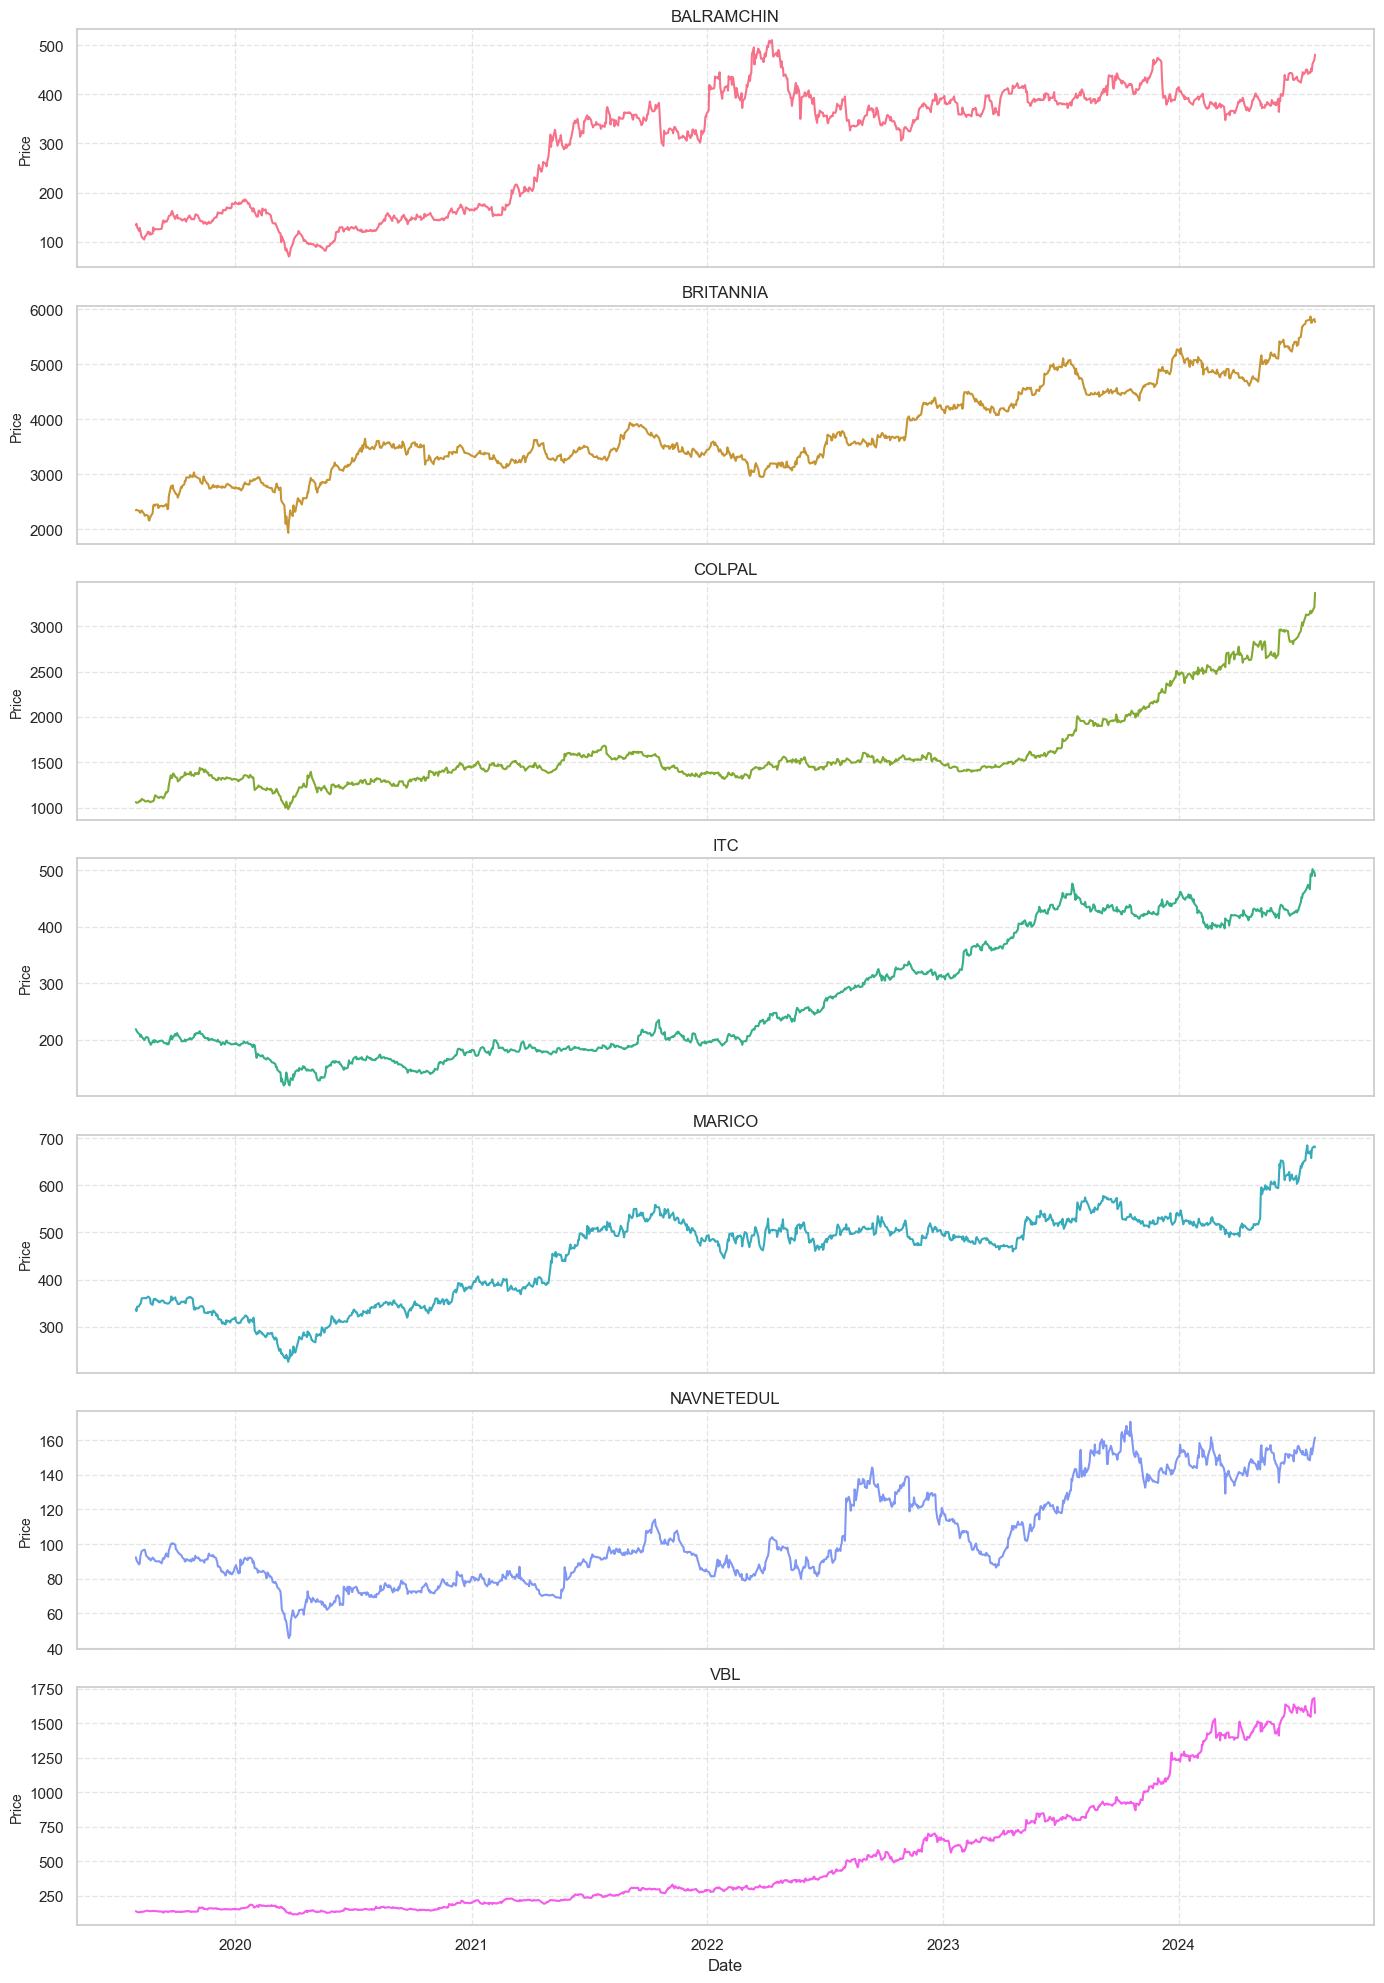

In [29]:
# Plotting Price
fig, axs = plt.subplots(nrows=7, ncols=1, figsize=(14, 20), sharex=True)
colors = sns.color_palette("husl", len(fmcg_stocks))

for i, column in enumerate([col for col in fmcg_close]):
    sns.lineplot(x=fmcg_close.index, y=fmcg_close[column], ax=axs[i], color=colors[i % len(colors)])
    axs[i].set_title(column.split('.')[0], fontsize=12)
    axs[i].set_ylabel('Price', fontsize=10)
    axs[i].grid(True, linestyle='--', alpha=0.5)

plt.xlabel('Date', fontsize=12)
plt.tight_layout()
plt.show()

#### Return plots of FMCG stocks

In [30]:
# Getting Returns
returns_data = vol.returns(data_fmcg['Adj Close']).dropna()

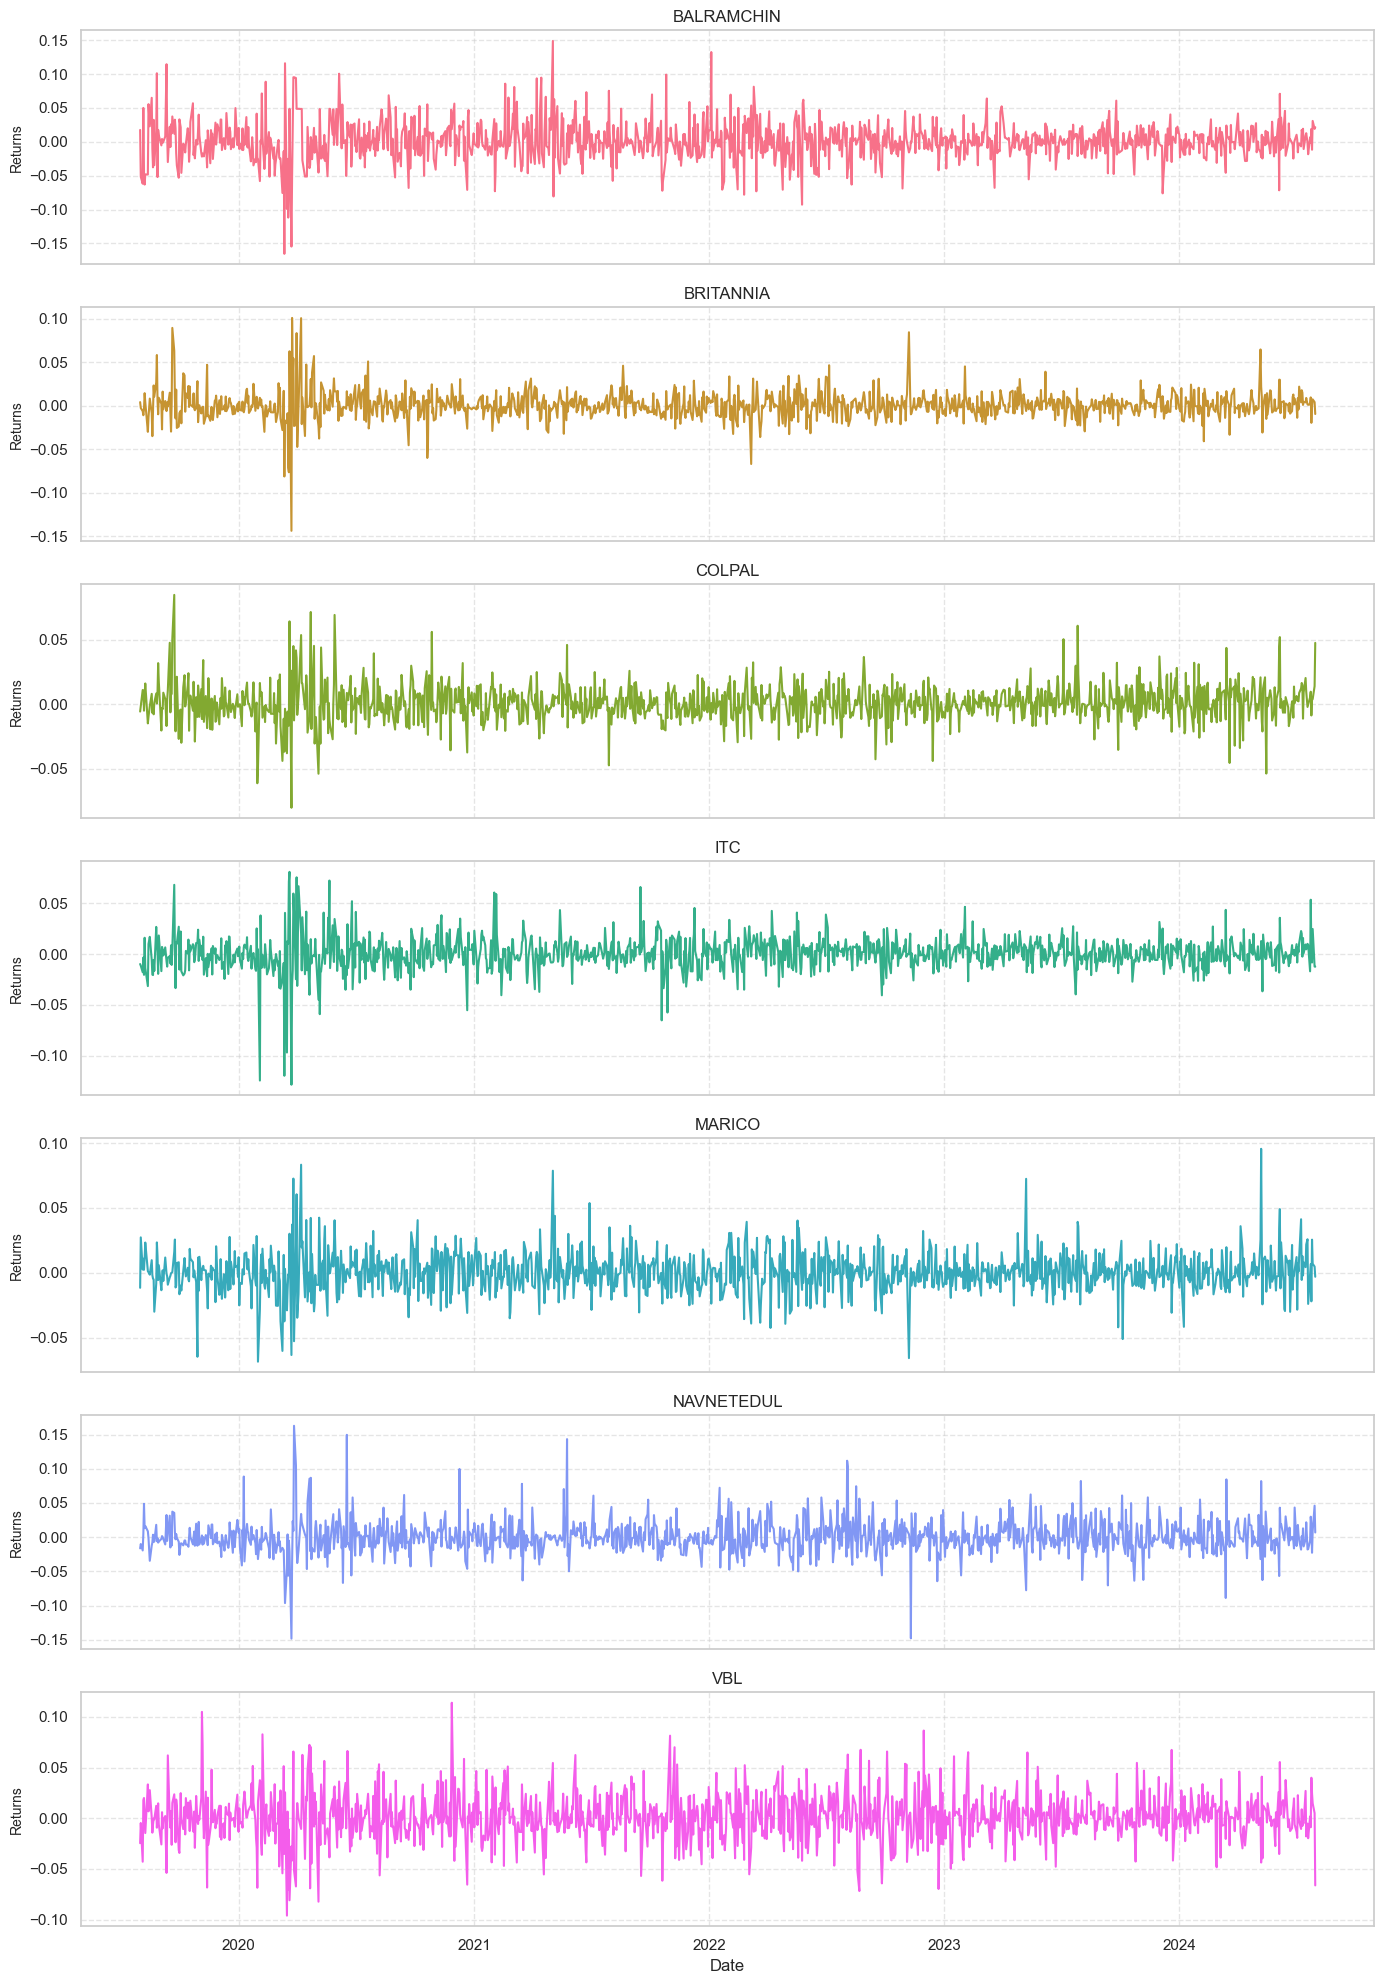

In [31]:
# Plotting Returns
sns.set(style="whitegrid")

fig, axs = plt.subplots(nrows=7, ncols=1, figsize=(14, 20), sharex=True)

for i, column in enumerate([col for col in returns_data.columns if '_log_returns' in col]):
    sns.lineplot(x=returns_data.index, y=returns_data[column], ax=axs[i], color=colors[i % len(colors)])
    axs[i].set_title(column.split('.')[0], fontsize=12)
    axs[i].set_ylabel('Returns', fontsize=10)
    axs[i].grid(True, linestyle='--', alpha=0.5)

plt.xlabel('Date', fontsize=12)
plt.tight_layout()
plt.show()

### Volatility Measures for FMCG sector

#### 1. Standard Deviation for FMCG sector

In [32]:
vol.standard_deviation(fmcg_close)

Returns  Log Returns
Stock                               
BALRAMCHIN.NS  0.028470     0.028369
BRITANNIA.NS   0.015677     0.015636
COLPAL.NS      0.014486     0.014430
ITC.NS         0.016601     0.016669
MARICO.NS      0.015659     0.015600
NAVNETEDUL.NS  0.024520     0.024271
VBL.NS         0.023676     0.023575

#### 2. Historical Volatility for FMCG sector

In [33]:
historical = vol.historical_volatility(fmcg_close).dropna()

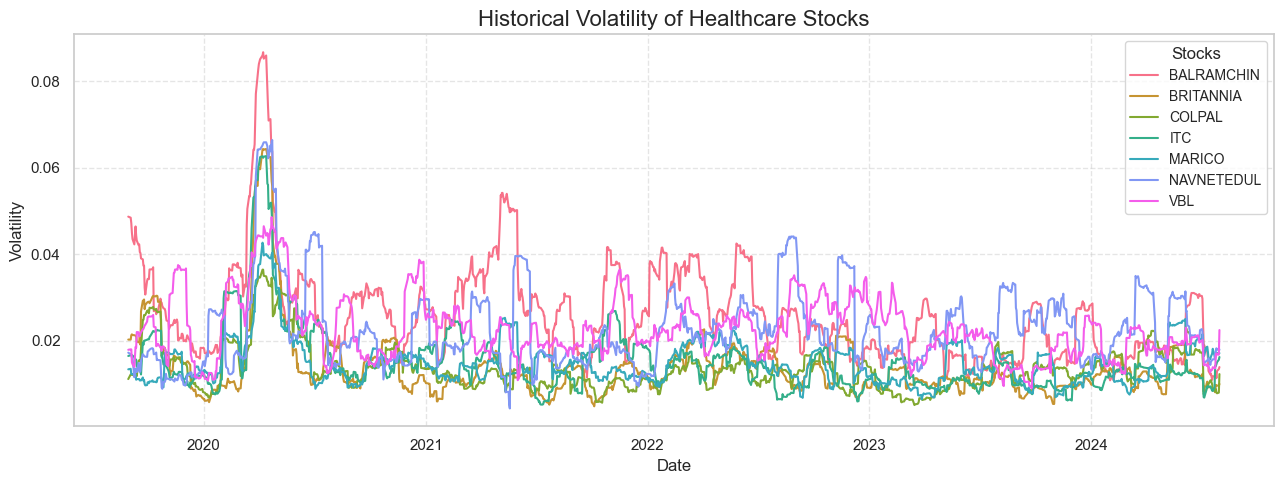

In [34]:
# Plotting Historical Volatility
plt.figure(figsize=(13, 5))
plt.grid(True, linestyle='--', alpha=0.5)

for i, column in enumerate(historical.columns):
    sns.lineplot(x=historical.index, y=historical[column], label=column.split('.')[0], color=colors[i % len(colors)])

plt.title('Historical Volatility of Healthcare Stocks', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Volatility', fontsize=12)

plt.legend(title='Stocks', fontsize=10)

plt.tight_layout()
plt.show()

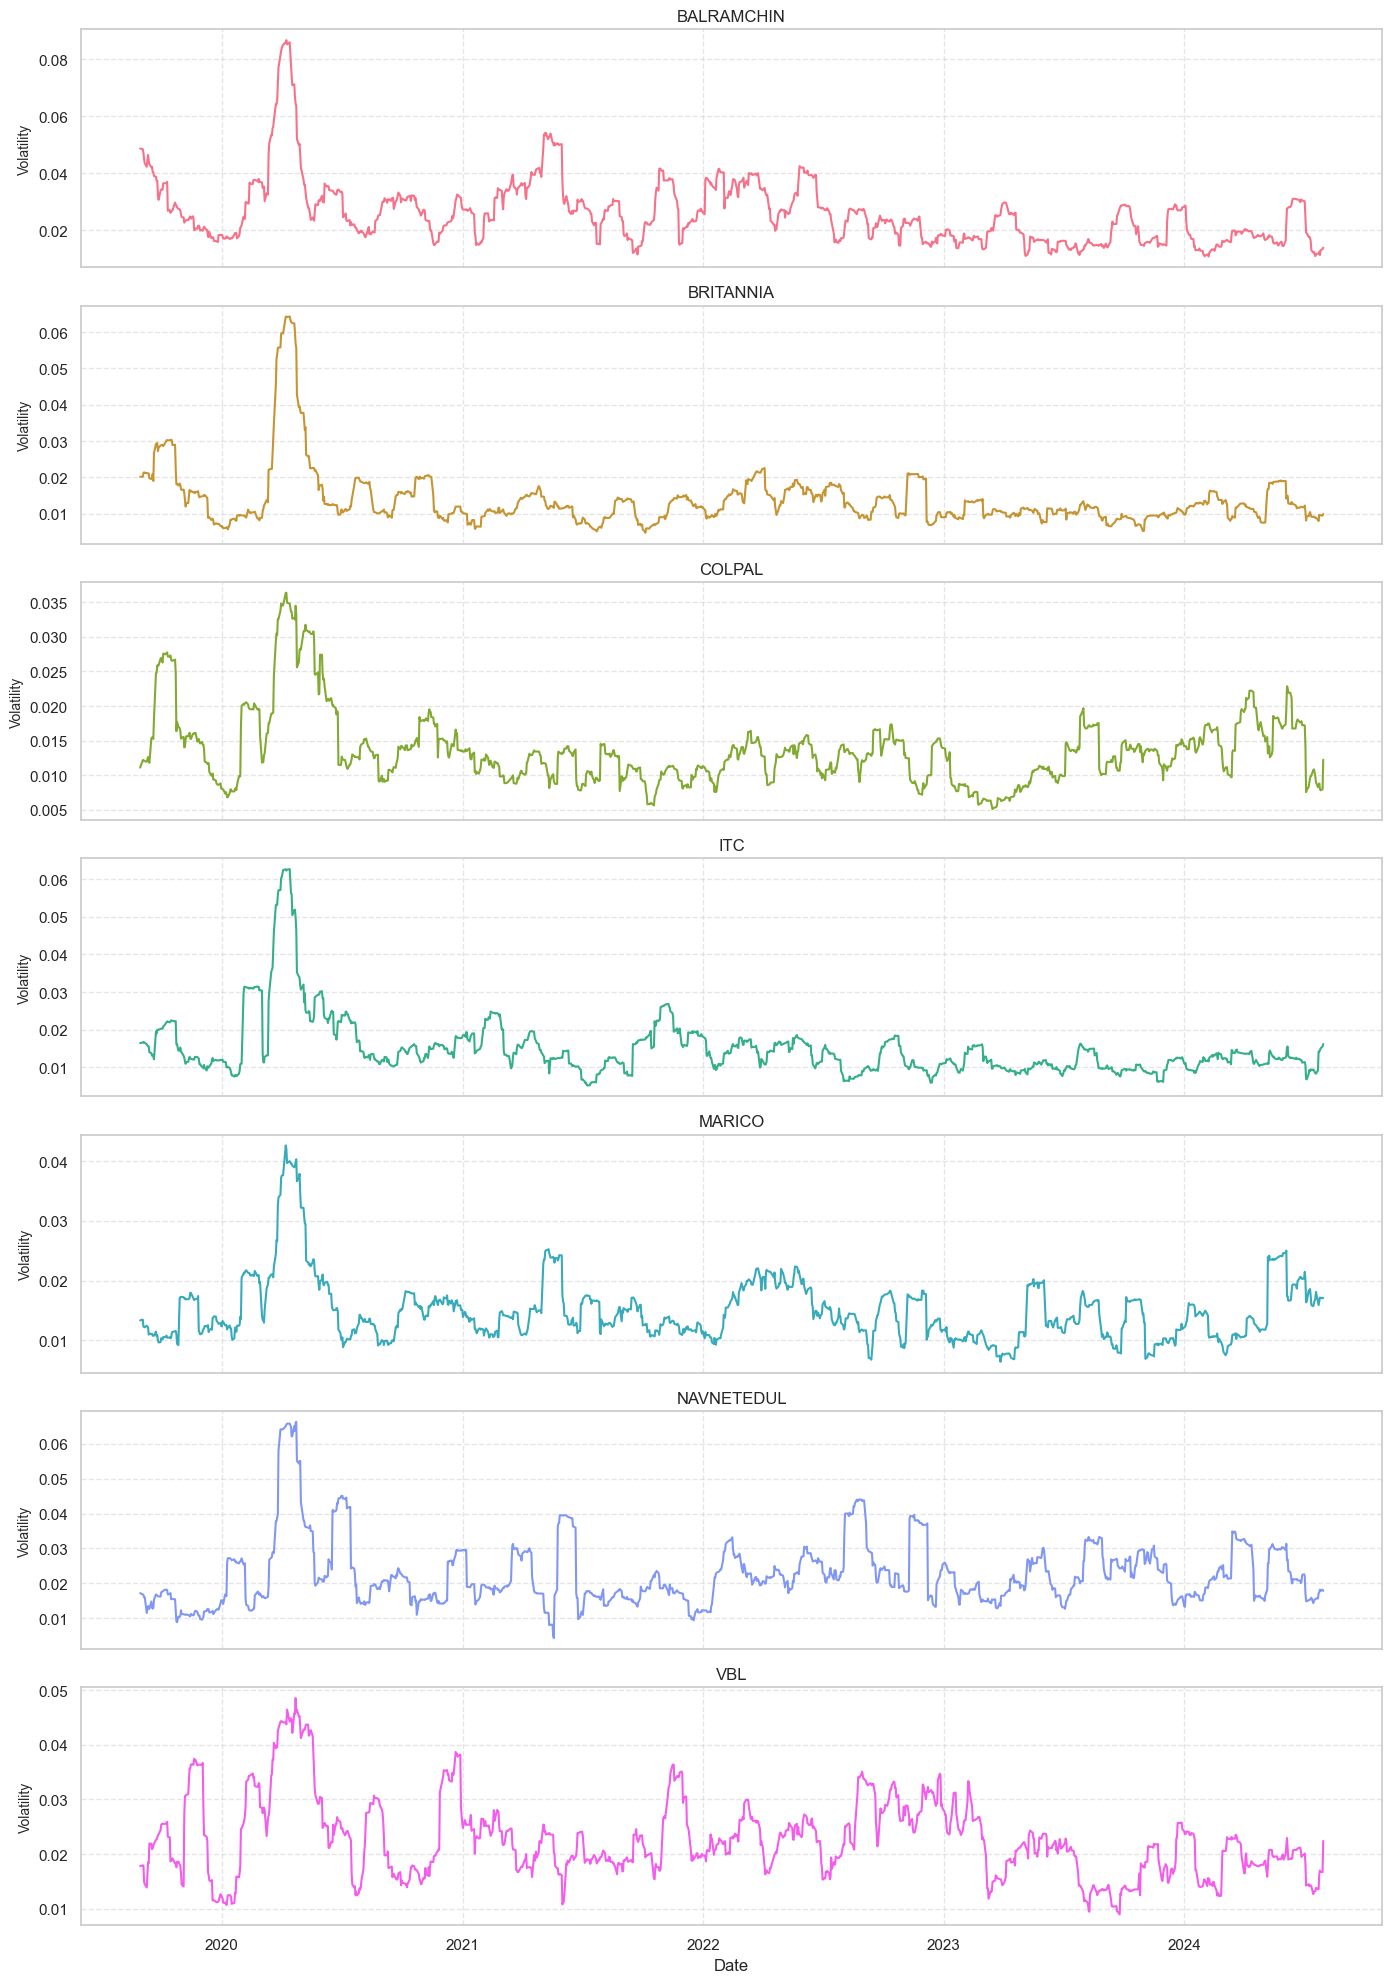

In [35]:
sns.set(style="whitegrid")

fig, axs = plt.subplots(nrows=7, ncols=1, figsize=(14, 20), sharex=True)

for i, stock in enumerate([col for col in historical]):
    sns.lineplot(x=historical.index, y=historical[stock], ax=axs[i], color=colors[i % len(colors)])
    axs[i].set_title(stock.split('.')[0], fontsize=12)
    axs[i].set_ylabel('Volatility', fontsize=10)
    axs[i].grid(True, linestyle='--', alpha=0.5)
    
plt.xlabel('Date', fontsize=12)
plt.tight_layout()
plt.show()

#### 3. Average True Range for FMCG sector

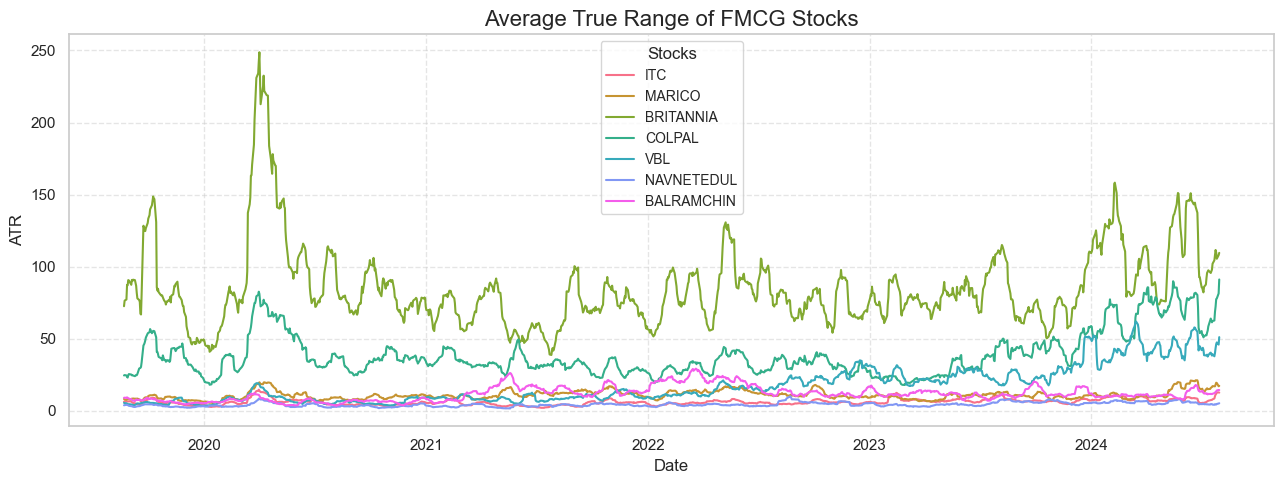

In [36]:
# Plotting ATR
plt.figure(figsize=(13, 5))
sns.set(style="whitegrid")
plt.grid(True, linestyle='--', alpha=0.5)

for i, stock in enumerate(fmcg_stocks):
    temp = pd.concat([data_fmcg['High'][stock], data_fmcg['Low'][stock], data_fmcg['Close'][stock]], axis=1)
    temp.columns = ['High', 'Low', 'Close']
    
    atr = vol.average_true_range(temp, 14)
    atr_series = atr['ATR']
    
    sns.lineplot(x=atr.index, y=atr_series, label=stock.split('.')[0], color=colors[i % len(colors)])

plt.title('Average True Range of FMCG Stocks', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('ATR', fontsize=12)
plt.legend(title='Stocks', fontsize=10)
plt.tight_layout()
plt.show()

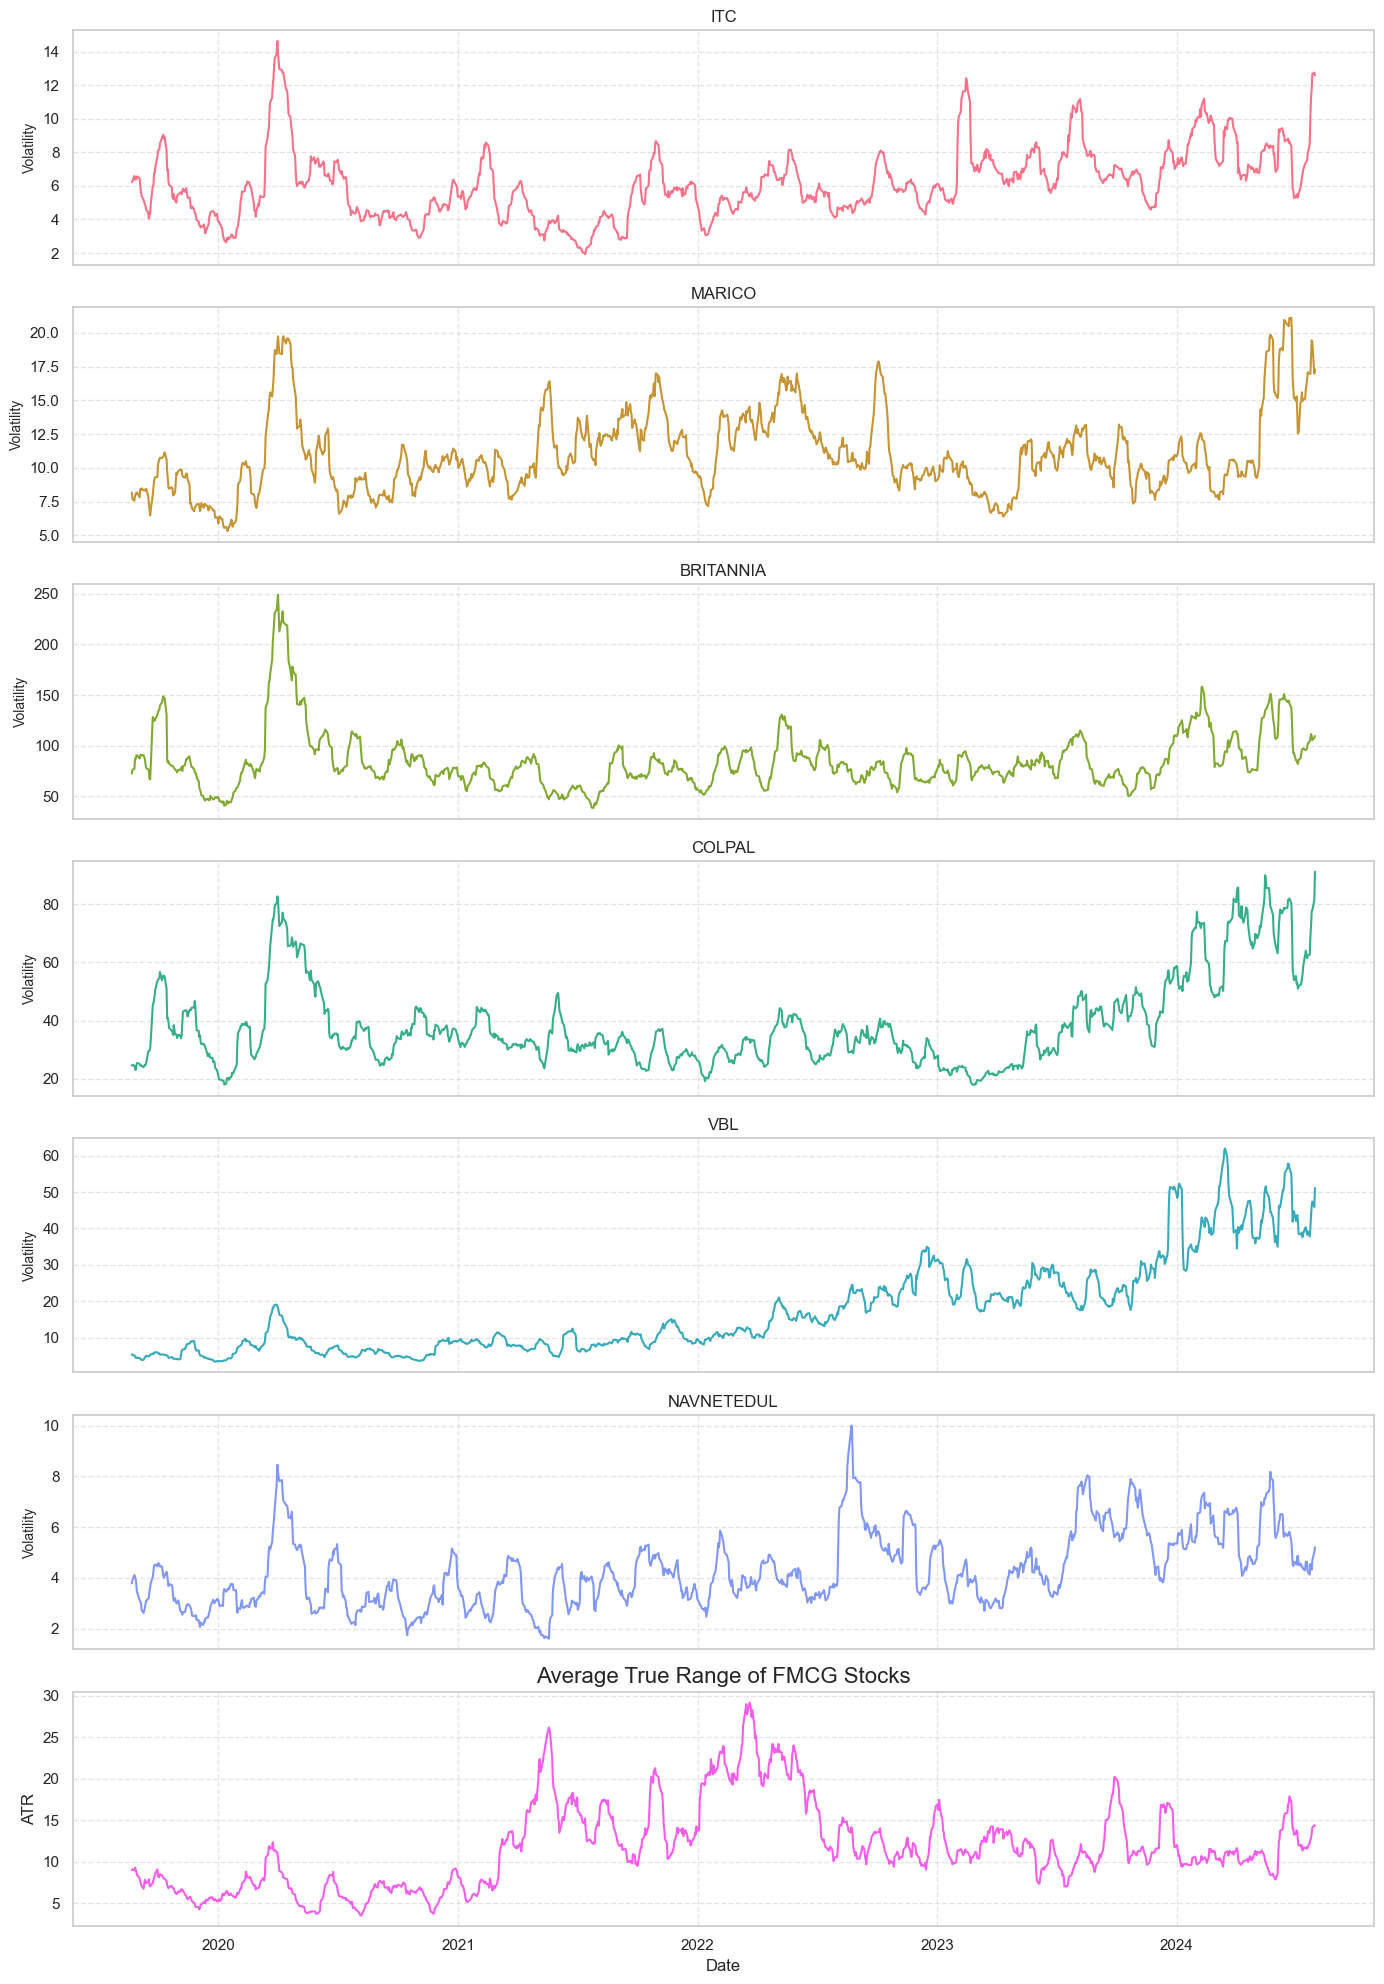

In [37]:
sns.set(style="whitegrid")

fig, axs = plt.subplots(nrows=7, ncols=1, figsize=(14, 20), sharex=True)

for i, stock in enumerate(fmcg_stocks):
    temp = pd.concat([data_fmcg['High'][stock], data_fmcg['Low'][stock], data_fmcg['Close'][stock]], axis=1)
    temp.columns = ['High', 'Low', 'Close']
    
    atr = vol.average_true_range(temp, 14)
    
    atr_series = atr['ATR']
    
    sns.lineplot(x=atr.index, y=atr_series, ax=axs[i], color=colors[i % len(colors)])
    axs[i].set_title(stock.split('.')[0], fontsize=12)
    axs[i].set_ylabel('Volatility', fontsize=10)
    axs[i].grid(True, linestyle='--', alpha=0.5)

plt.title('Average True Range of FMCG Stocks', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('ATR', fontsize=12)
plt.tight_layout()
plt.show()

#### 4. Beta for FMCG sector

In [38]:
vol.beta(fmcg_close, market_returns)

Beta
Stock                  
BALRAMCHIN.NS  0.953589
BRITANNIA.NS   0.612680
COLPAL.NS      0.435326
ITC.NS         0.694185
MARICO.NS      0.443089
NAVNETEDUL.NS  0.614023
VBL.NS         0.514998

#### 5. Max Drawdown for FMCG sector

In [39]:
vol.max_drawdown(data_fmcg['Adj Close'])

Max_Drawdown
BALRAMCHIN.NS     -0.622959
BRITANNIA.NS      -0.362312
COLPAL.NS         -0.316181
ITC.NS            -0.455033
MARICO.NS         -0.381377
NAVNETEDUL.NS     -0.544665
VBL.NS            -0.376898

# Conclusion

The best volatility measures according to various situations are: 

- **For Normally Distributed Returns:** The standard deviation of log returns is typically the most appropriate measure since it assumes a normal distribution.

- **For Non-Normal Returns:** If returns are not normally distributed (e.g., skewed or have fat tails), ATR or maximum drawdown might be better at capturing the actual risk exposure, especially in volatile markets with frequent price gaps or large downturns.

- **For Short-Term Trading:** Historical volatility and ATR are useful, as they capture recent price dynamics, with ATR being particularly effective in volatile markets with significant intraday movements.

- **For Market Sensitivity:** Beta is essential when analyzing a stock’s behaviour about the market, especially for portfolio diversification strategies.

Few of our stocks exhibit normally distributed returns whereas some exhibit non-normally distributed, so the best measures are according to the particular stock. And according to the frequency measures are different, therefore if we rebalance the portfolio within short time intervals during highly volatile market conditions, historical volatility and ATR can be used whereas if the market is stable standard deviation can be used for normally distributed and maximum drawdown, ATR for non normally distributed.